  #  House Price Prediction

### Objective

- The aim is to predict the efficient house pricing for real estate customers with respect to their budgets and priorities.
- The technologies using in this project are 'Python', 'EDA', 'Statistics' and 'Machine Learning'. 

### Importing Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

### Importing Dataset

In [151]:
train_df = pd.read_csv('./train.csv',index_col=0)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [152]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

- The below mentioned columns had more than 30% of Nan values so dropping those columns.

In [153]:
train_df = train_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

## Data Cleaning

### EDA

#### Missing Values



- Before statistical test do the missing values treatment

In [154]:
                           ## This is for Object column ##

for i in train_df.select_dtypes(include = 'object').columns:
    if train_df[i].isna().sum()/train_df.shape[0] < 0.20:
        train_df[i] = train_df[i].fillna(train_df[i].mode()[0])
    else:
        train_df = train_df.drop(i, axis =1)

                          ## This is for Int and Float column ##

for i in train_df.select_dtypes(exclude = 'object').columns:
    if train_df[i].isna().sum()/train_df.shape[0] < 0.20:
        train_df[i] = train_df[i].fillna(train_df[i].median())
    else:
        train_df = train_df.drop(i,axis =1)

- Before we do EDA and statistical test convert the variables to string which is categorical.

In [155]:
train_df[['YearBuilt','YearRemodAdd',"MSSubClass","BsmtFullBath",'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','MoSold','YrSold']] = train_df[['YearBuilt','YearRemodAdd',"MSSubClass","BsmtFullBath",'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','MoSold','YrSold']].astype(str)

- Barplot for all the categorical columns with the dependent variable.

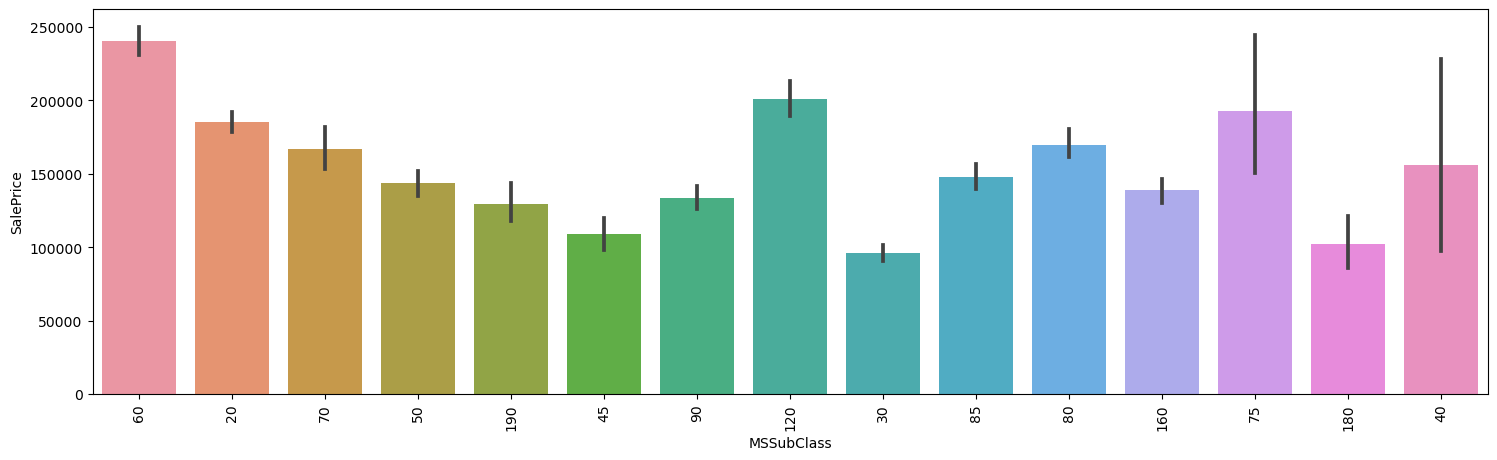

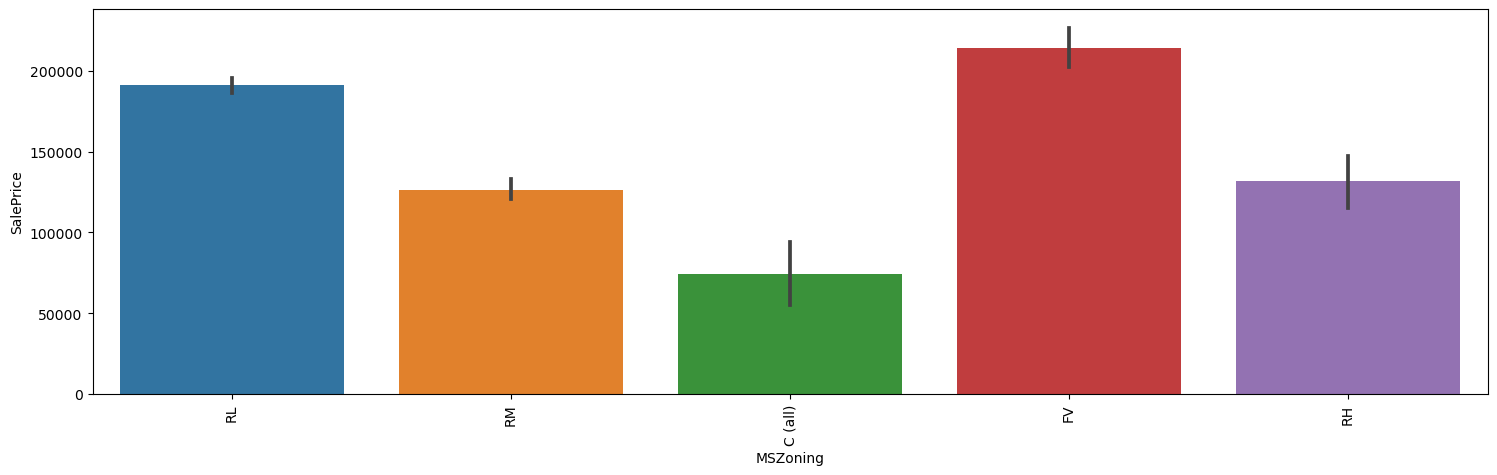

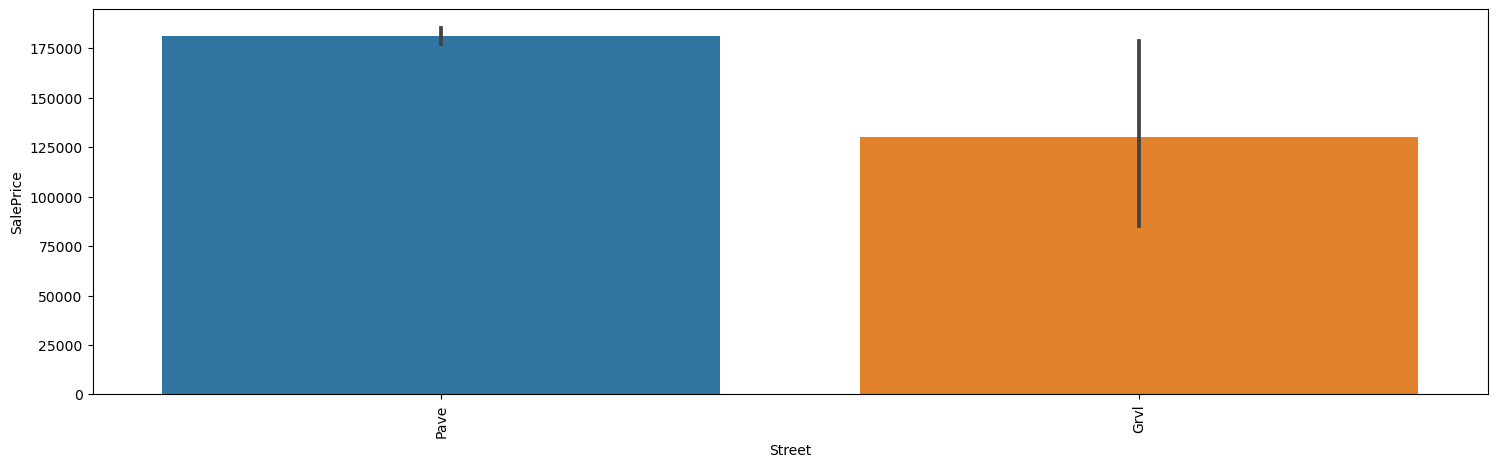

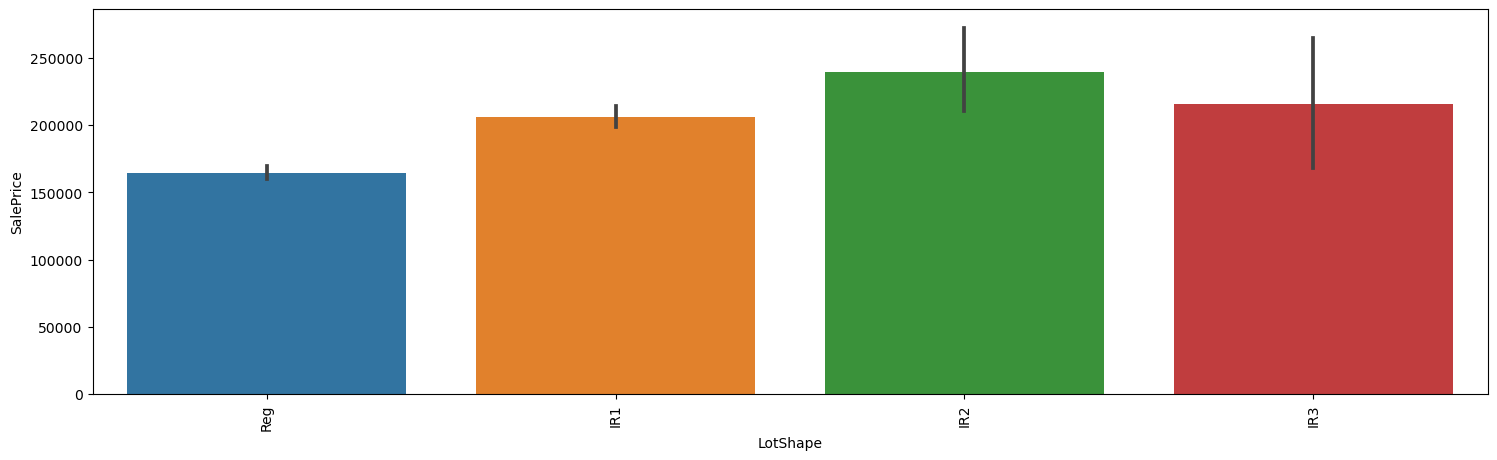

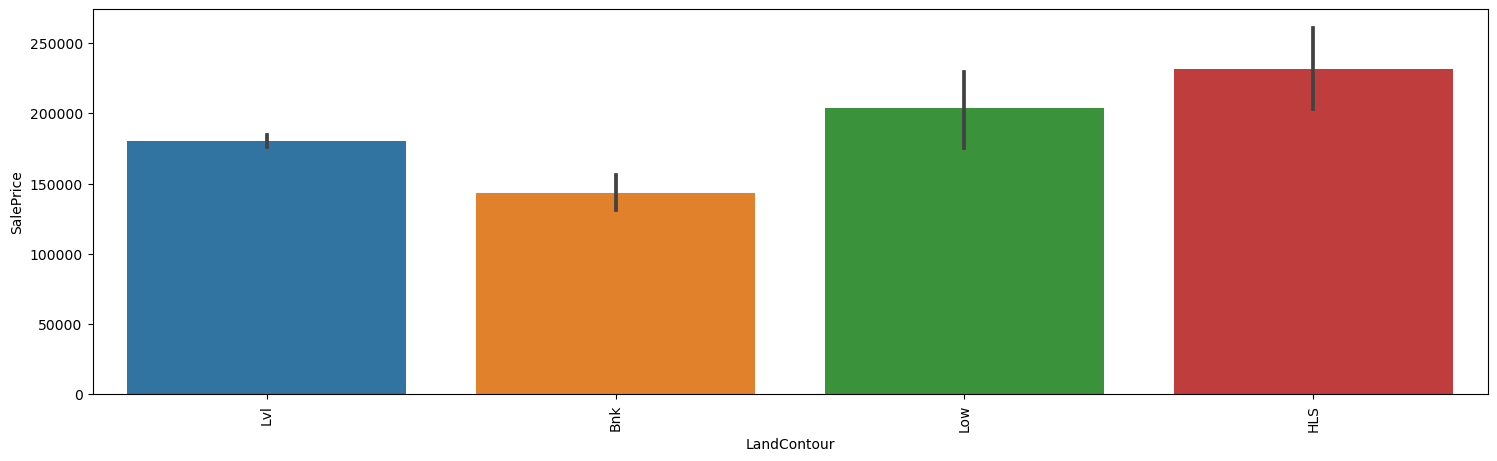

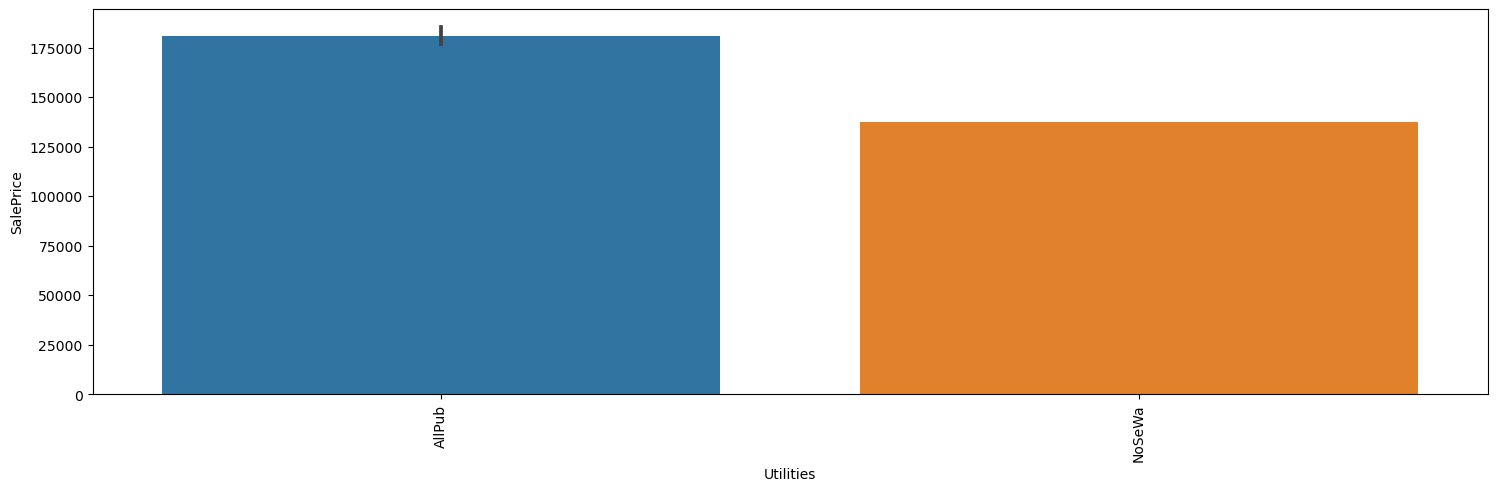

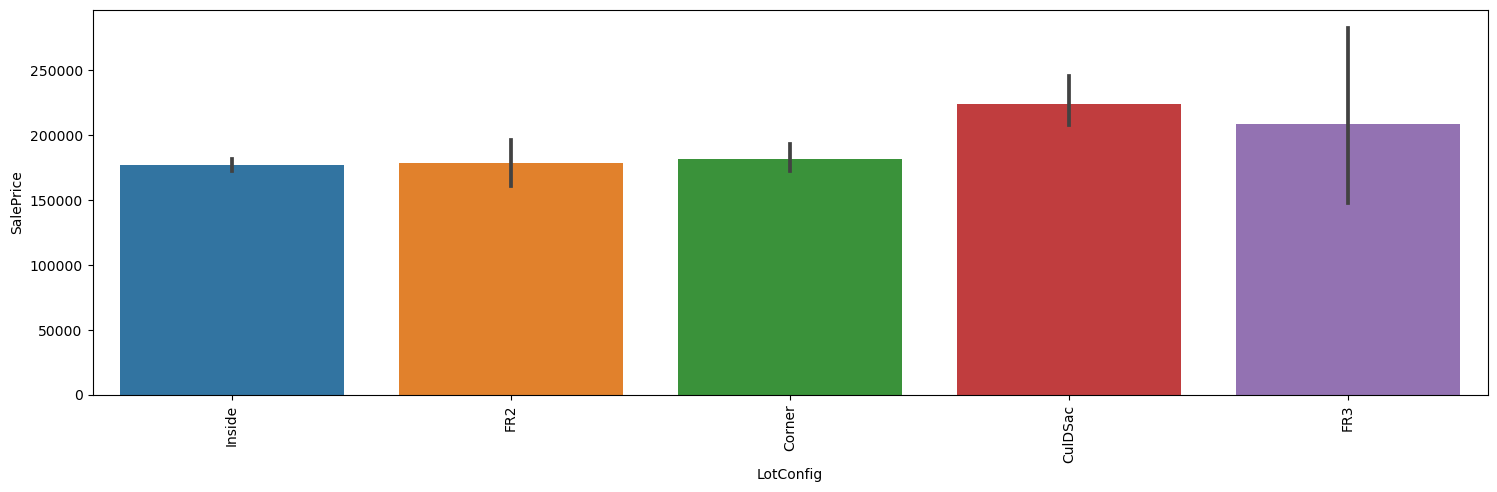

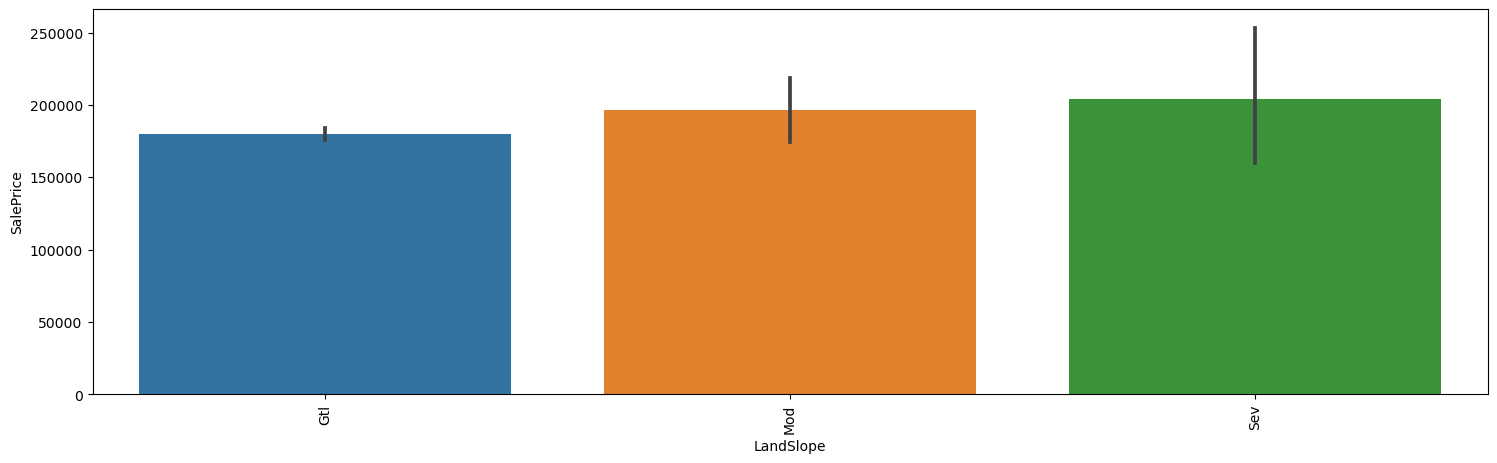

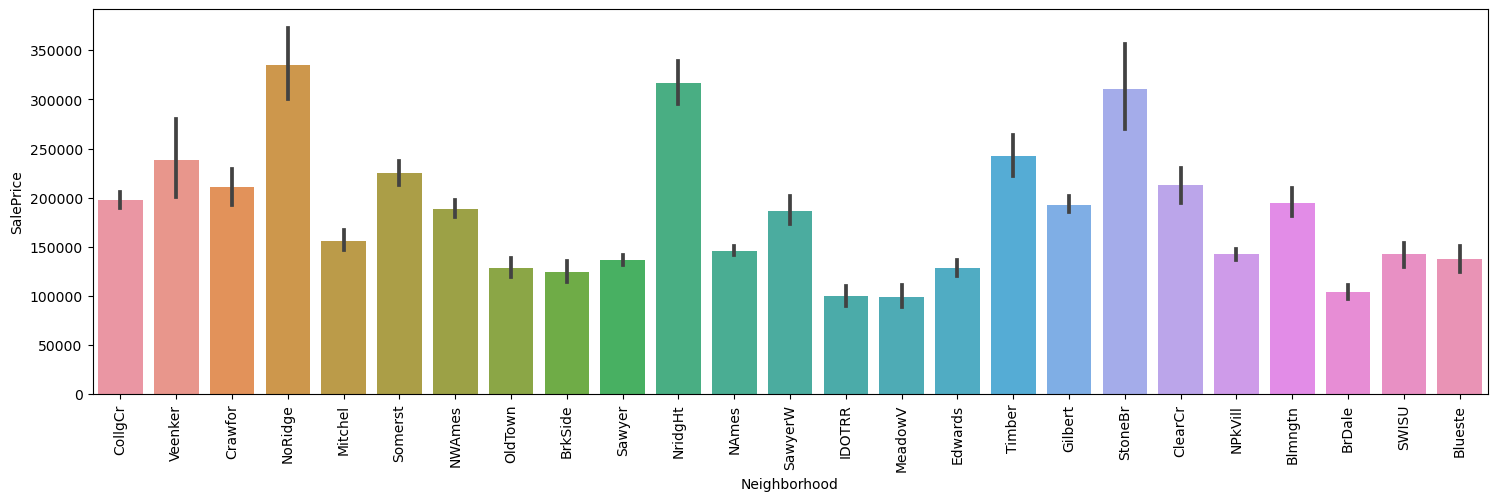

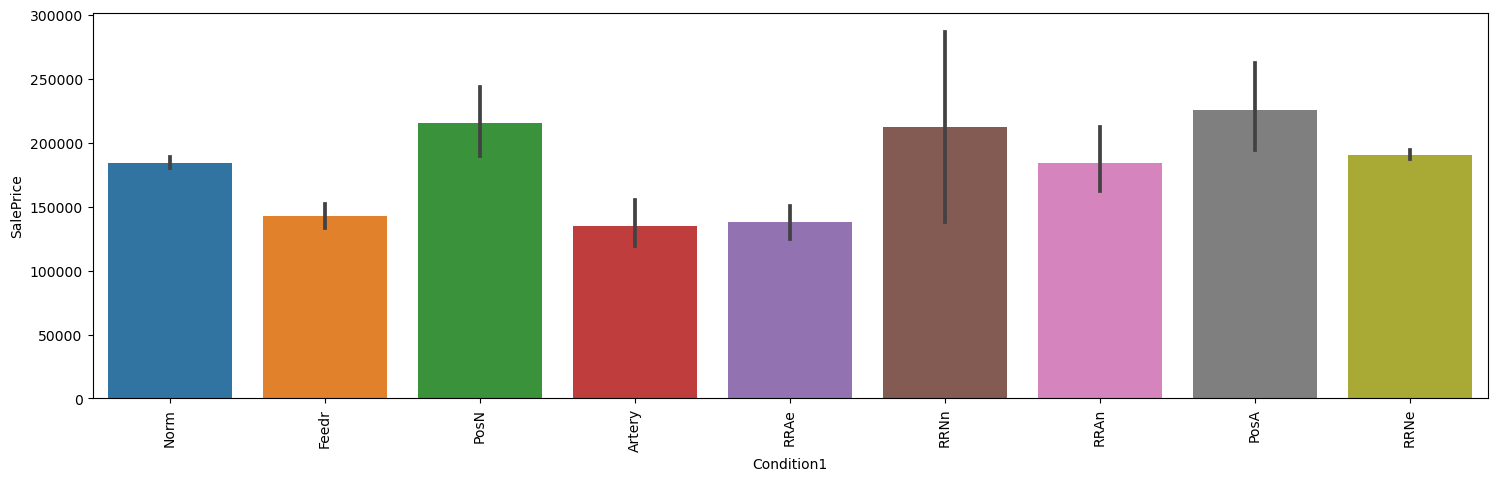

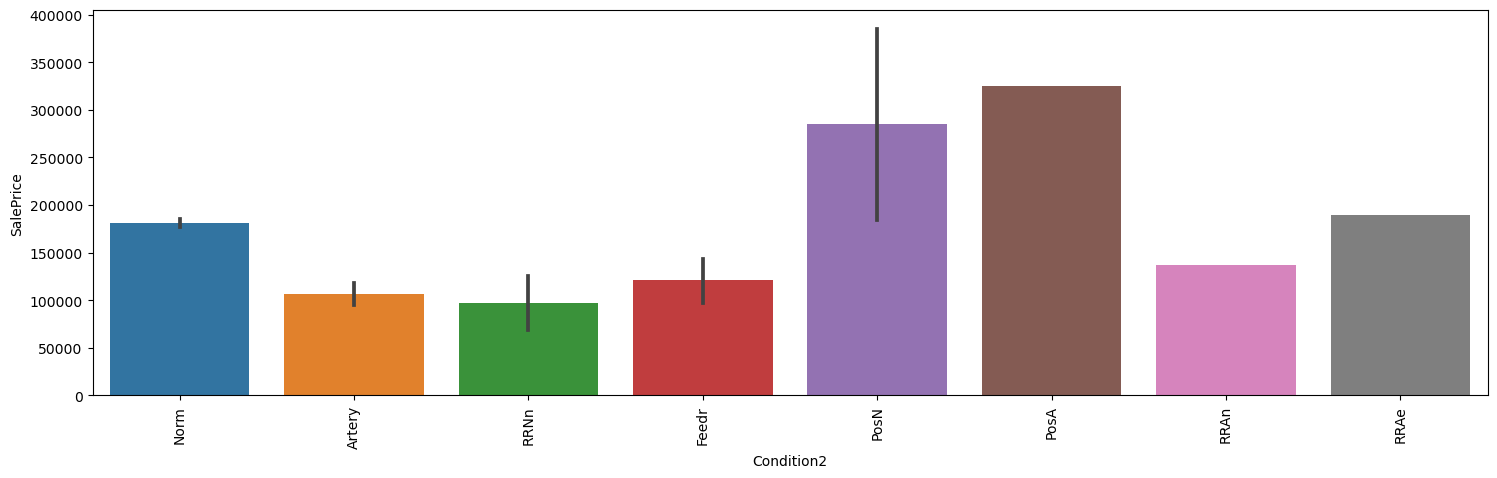

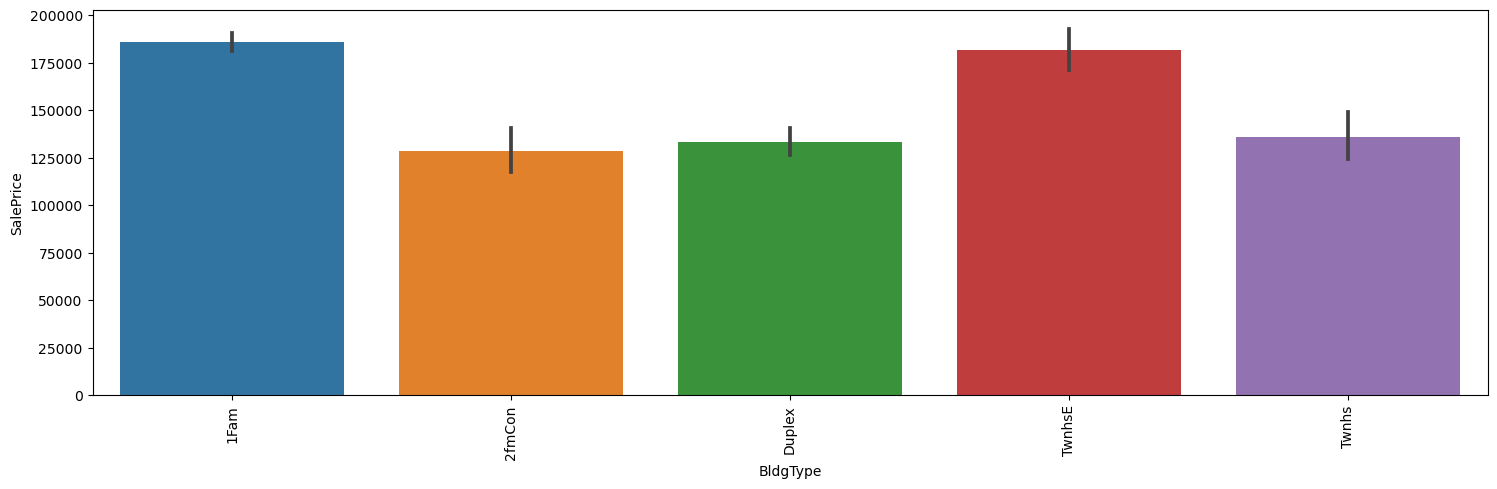

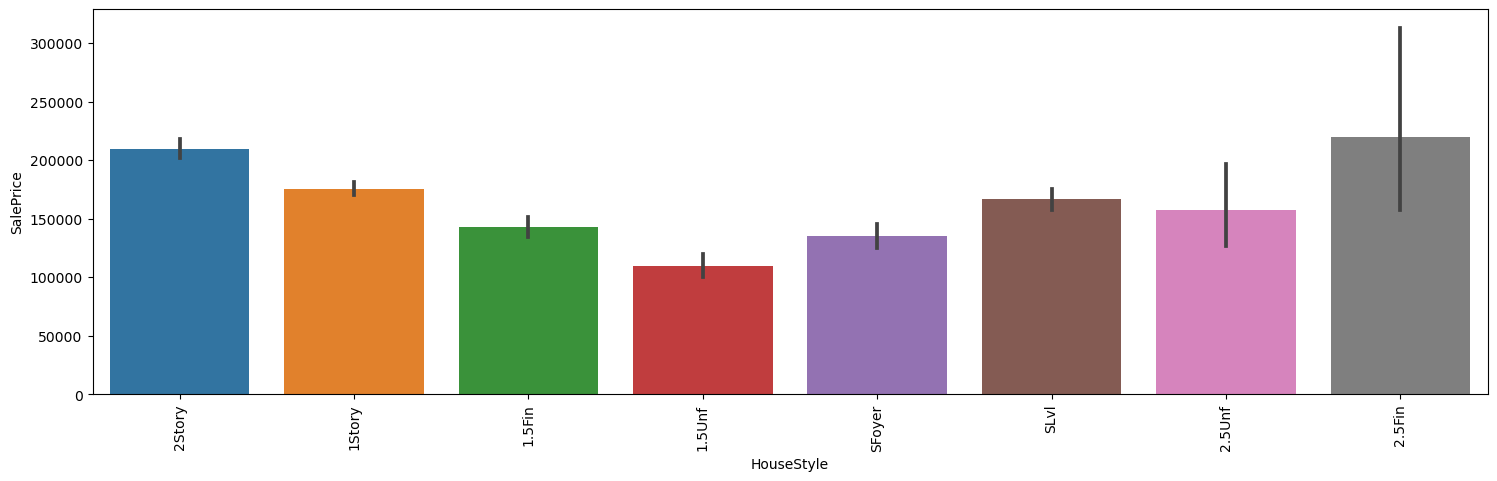

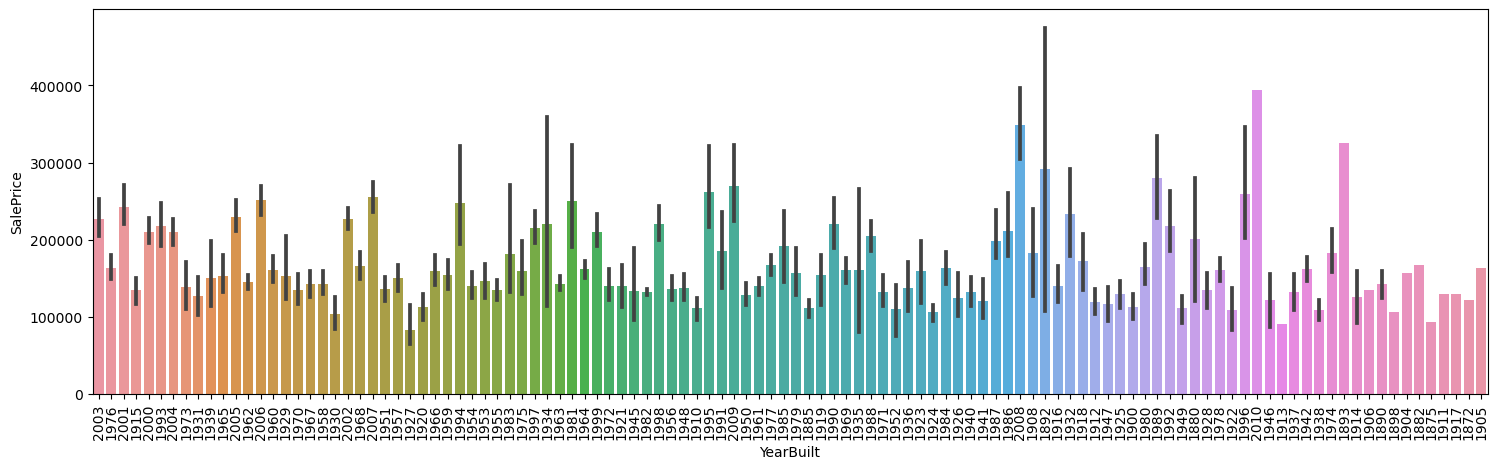

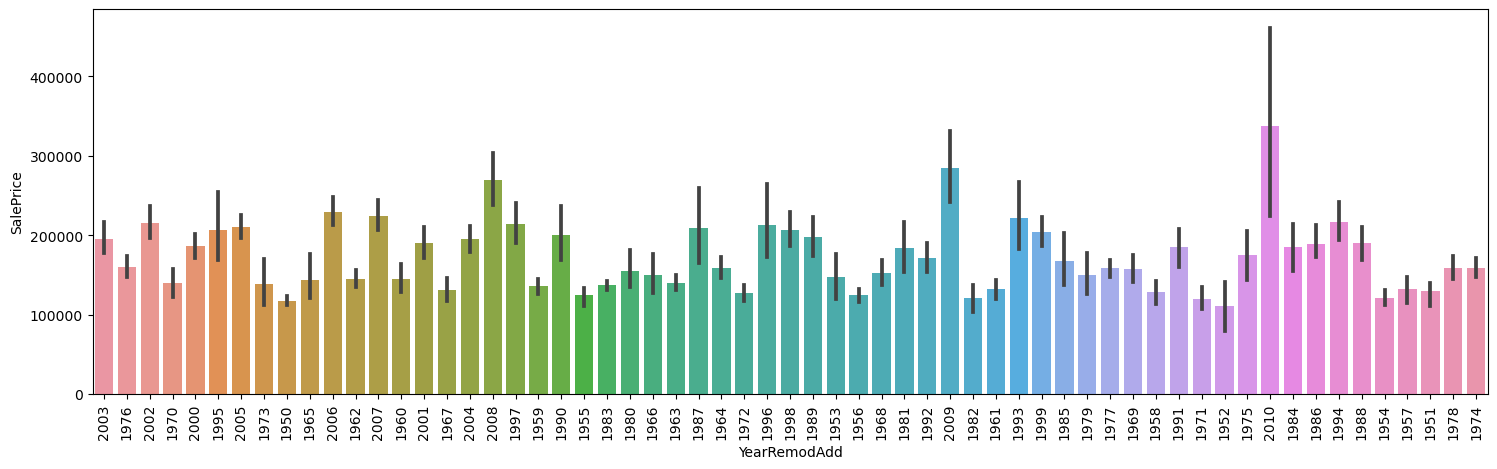

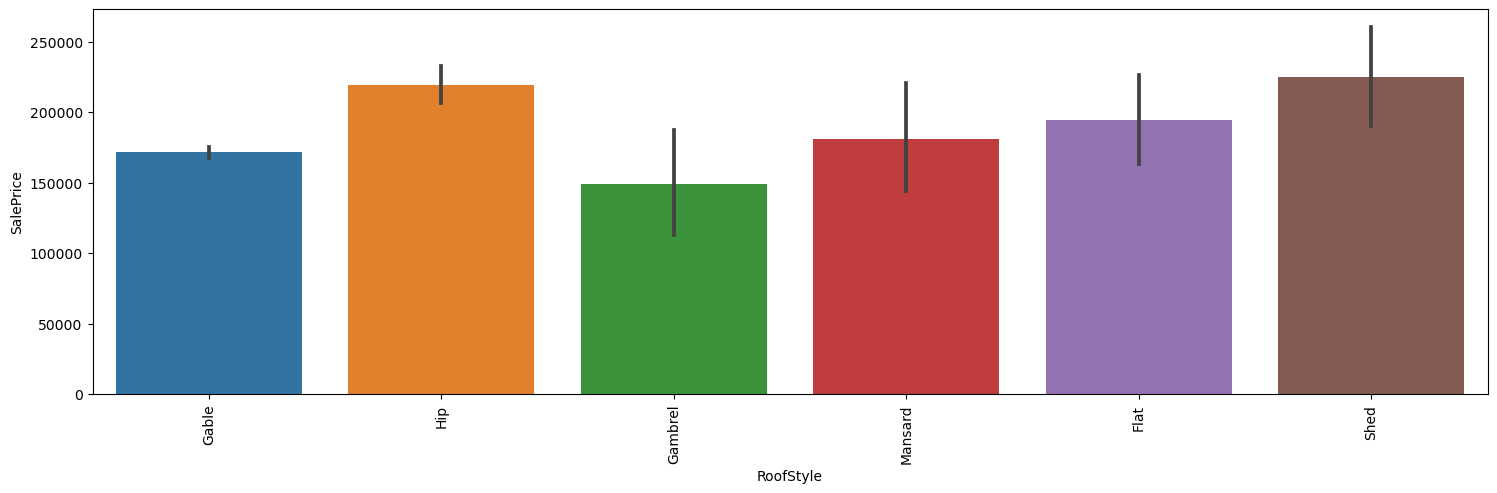

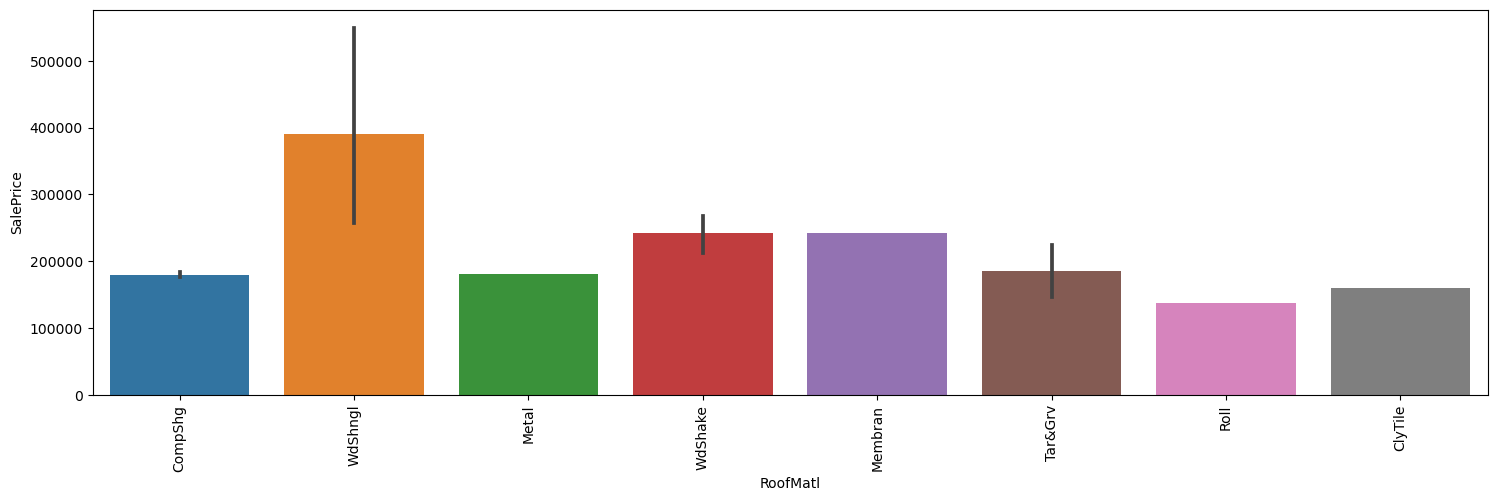

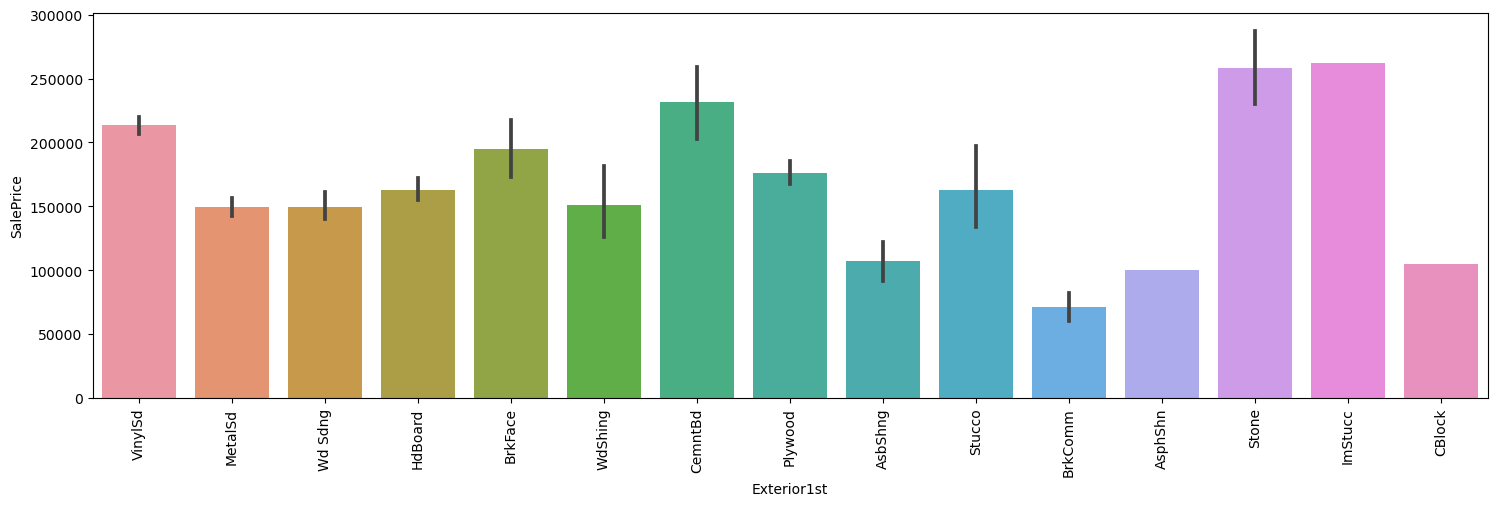

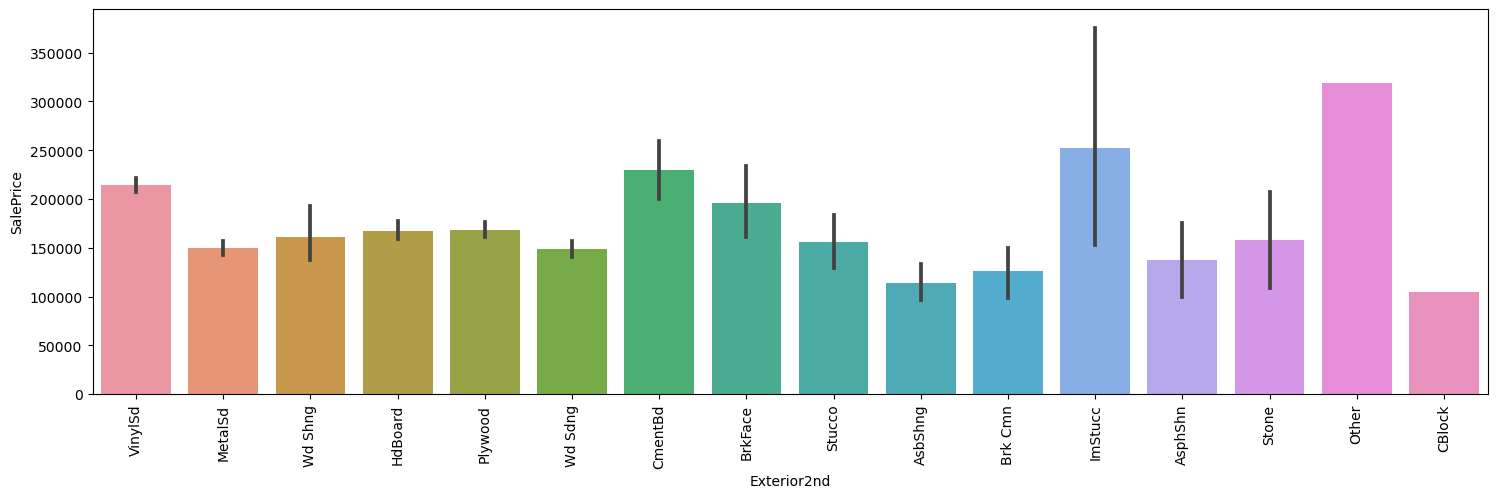

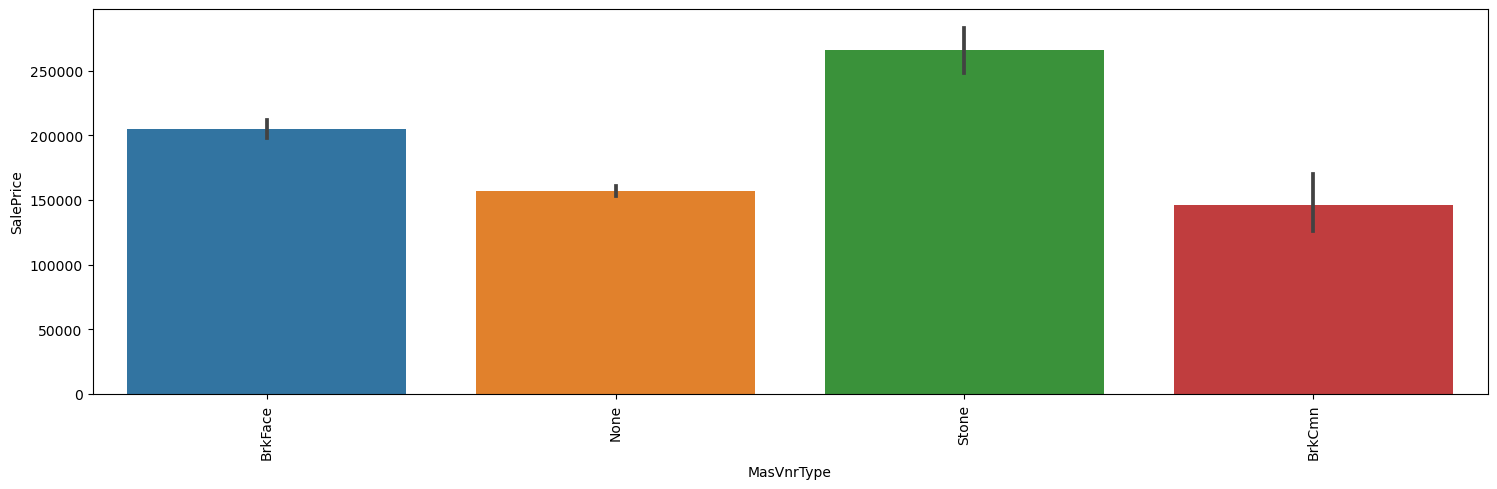

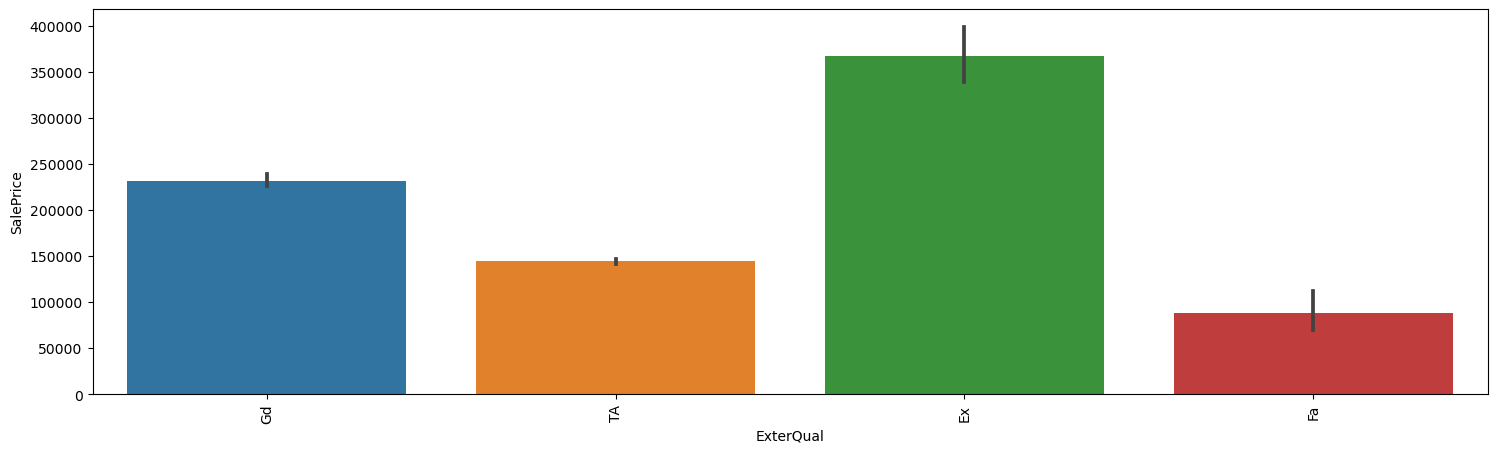

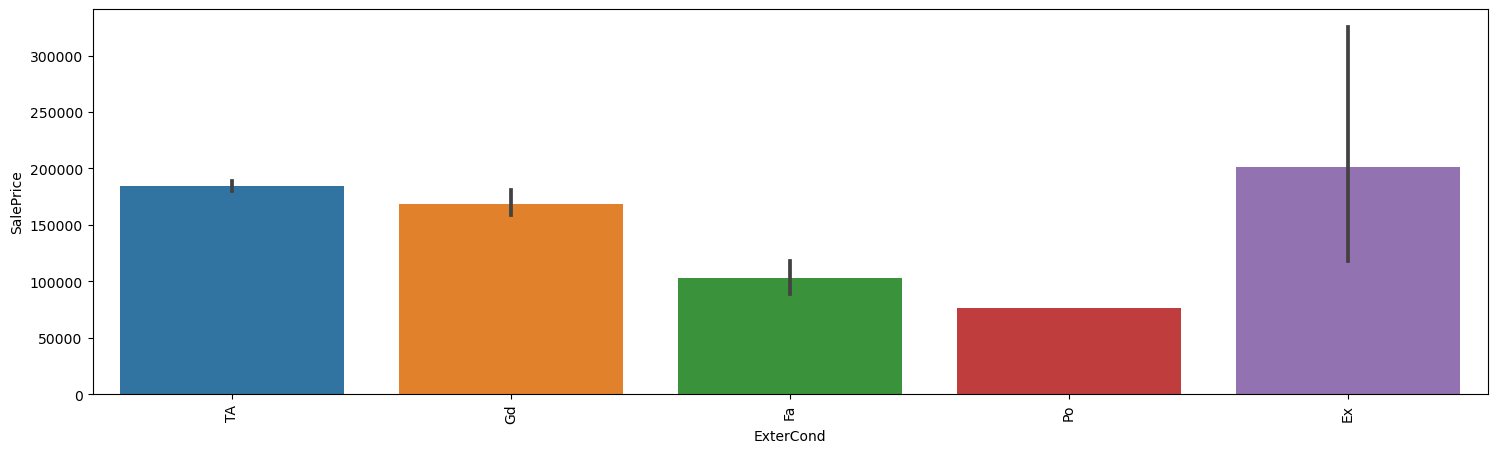

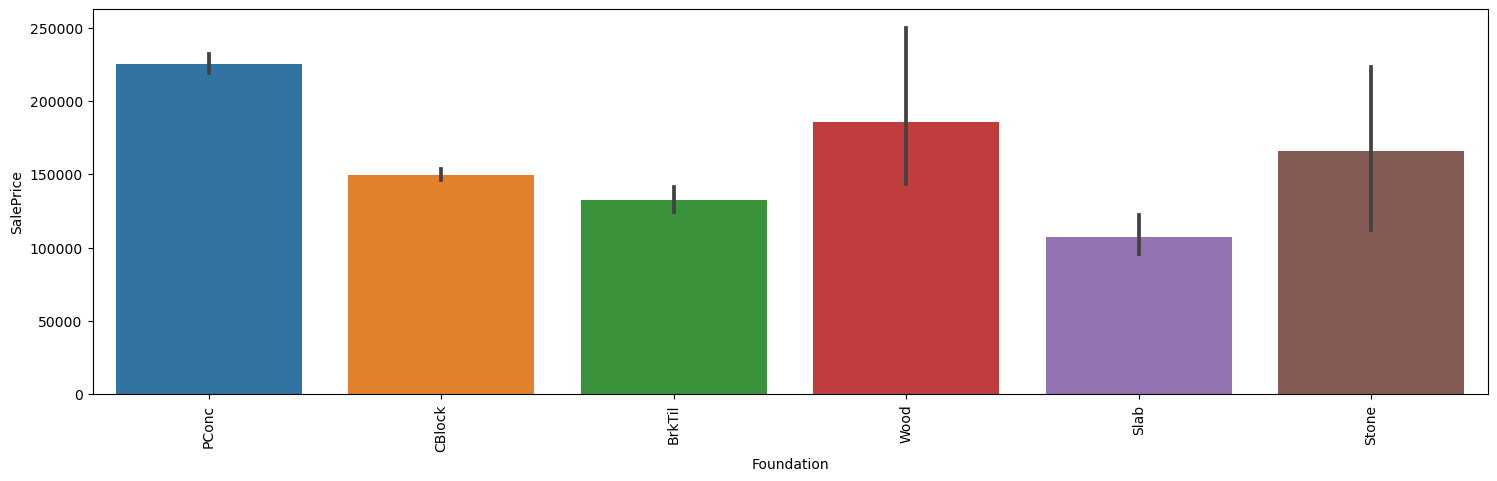

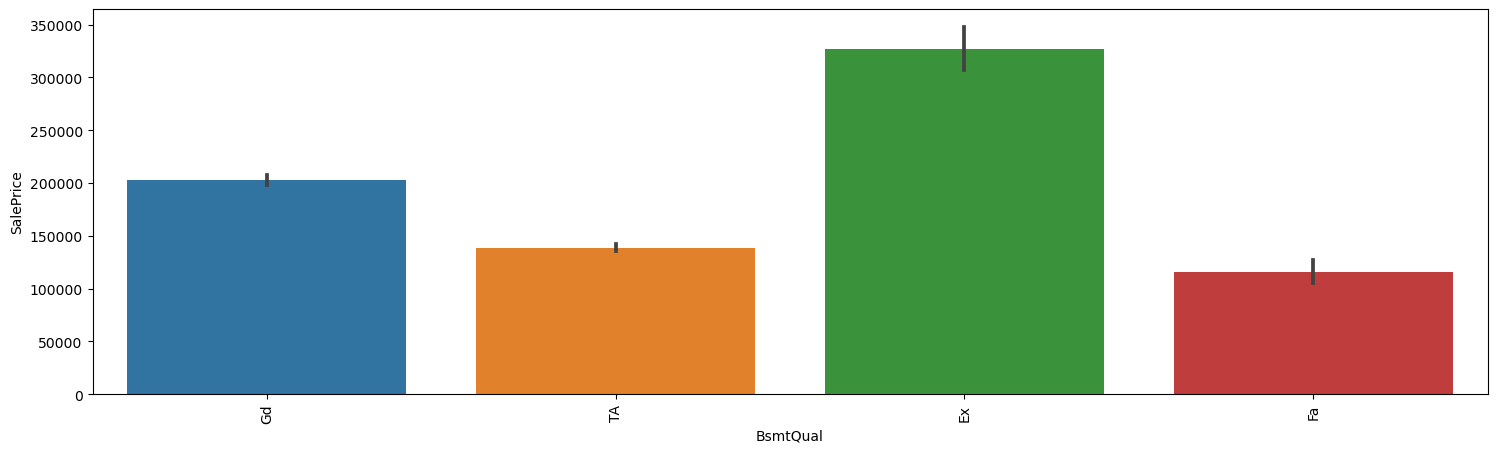

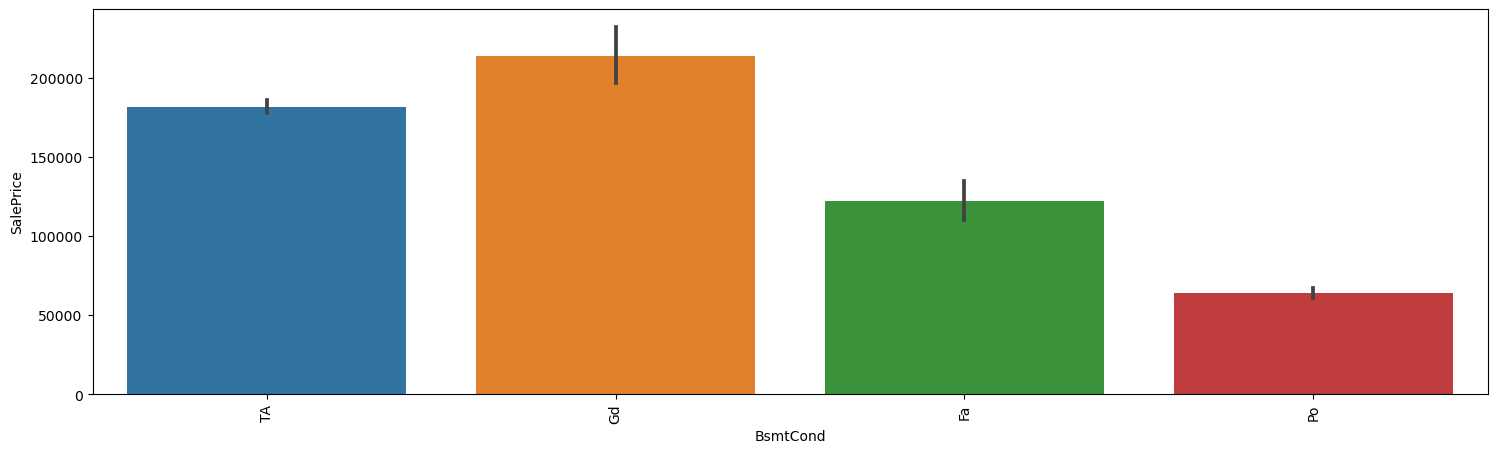

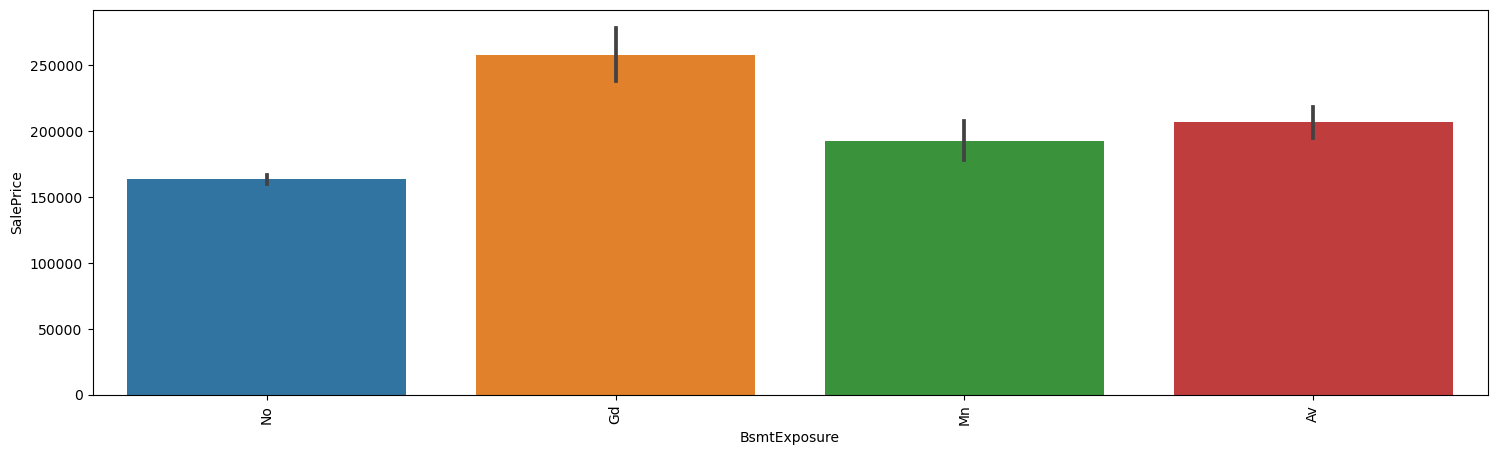

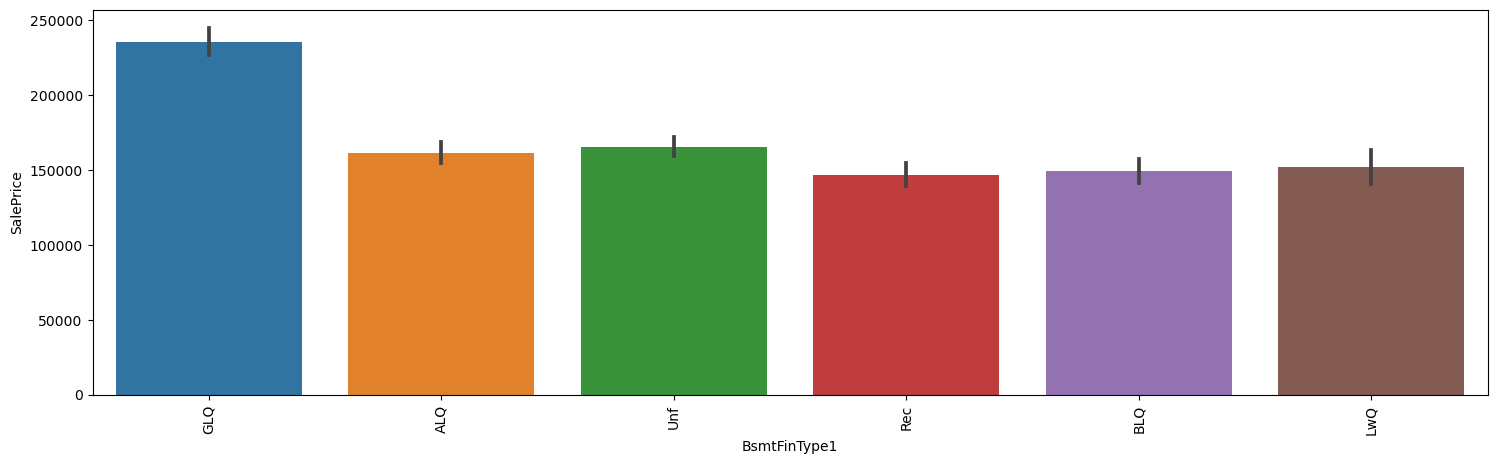

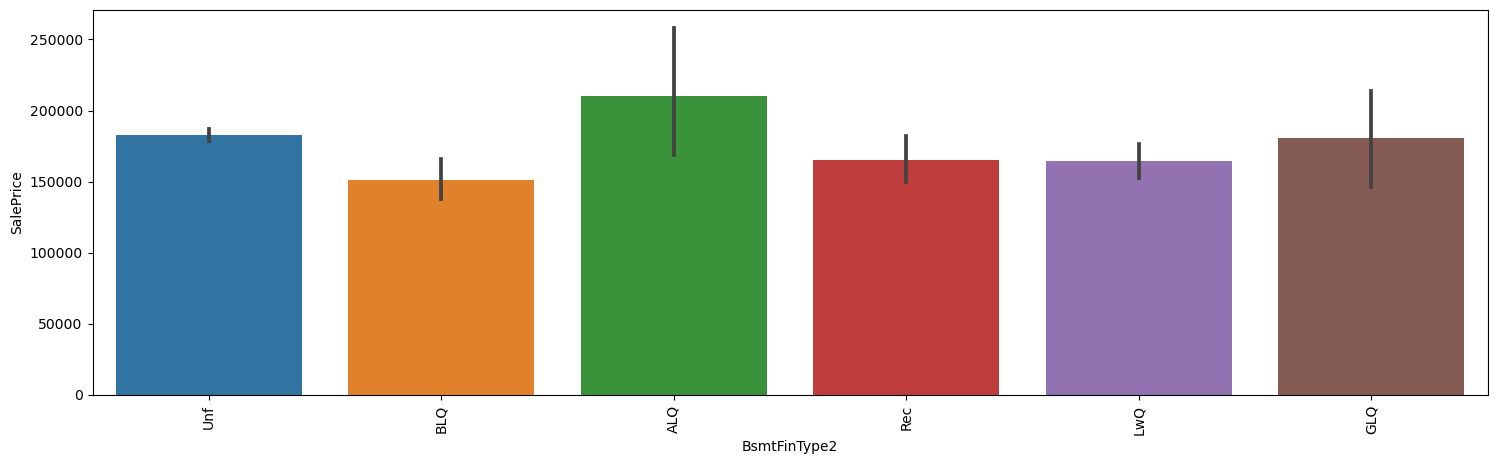

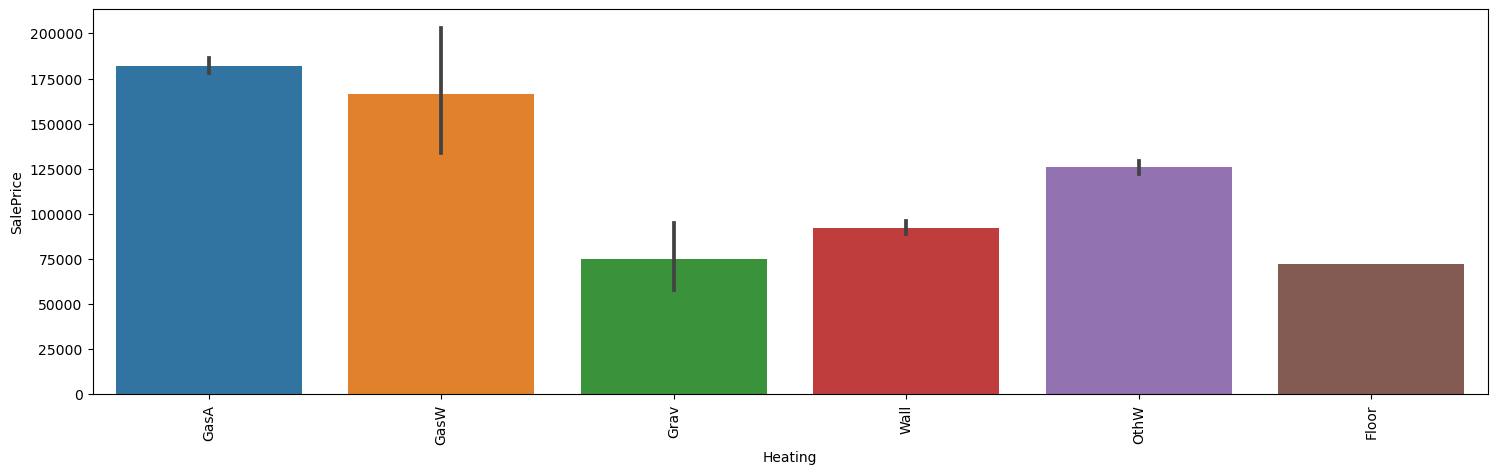

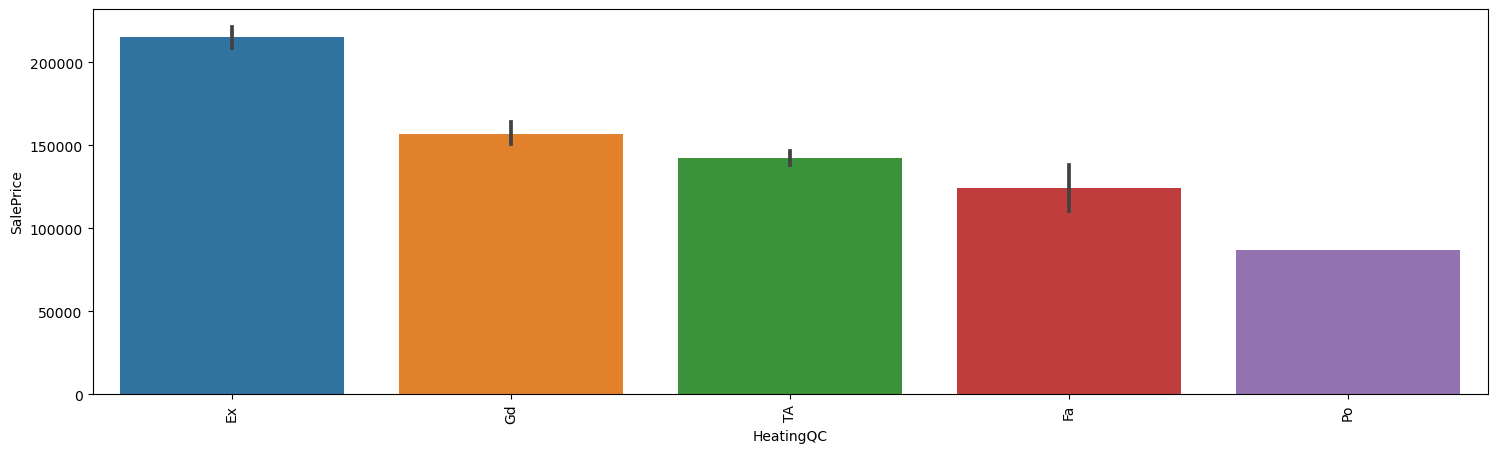

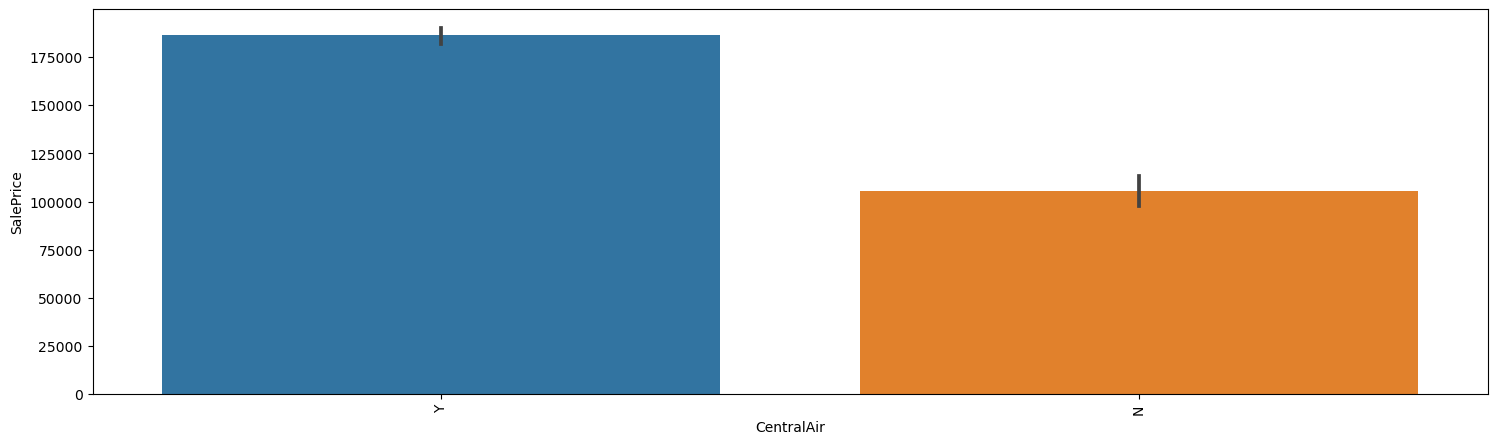

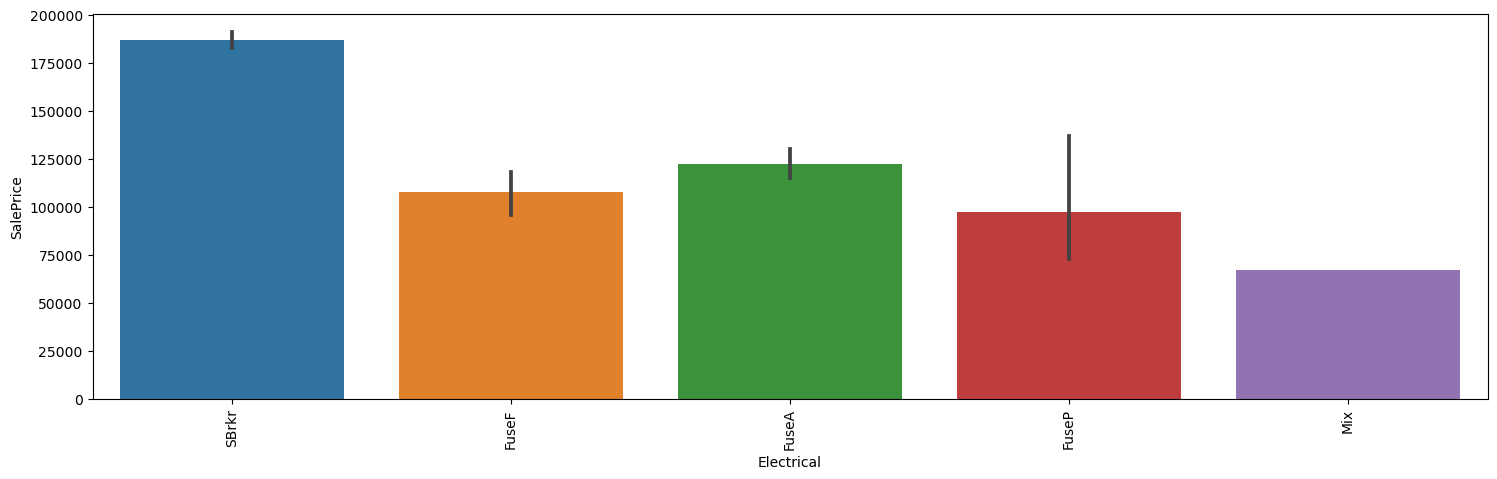

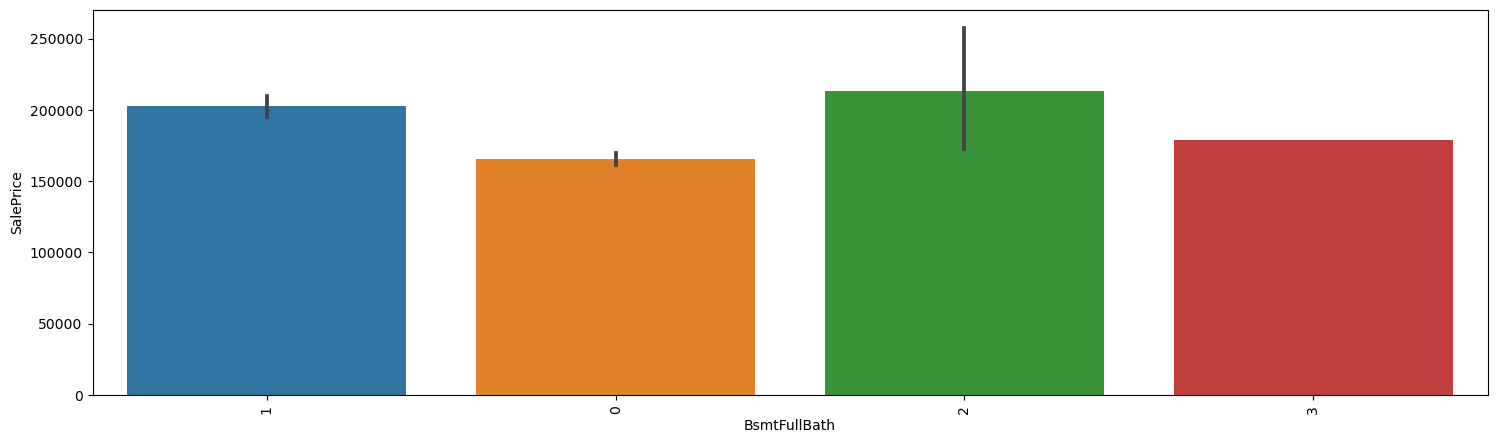

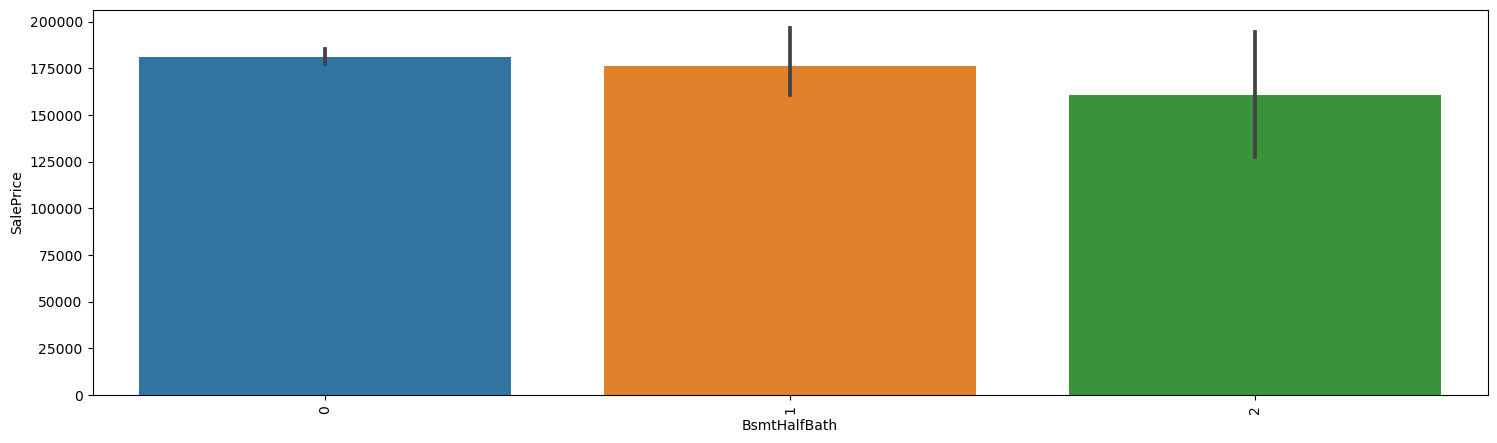

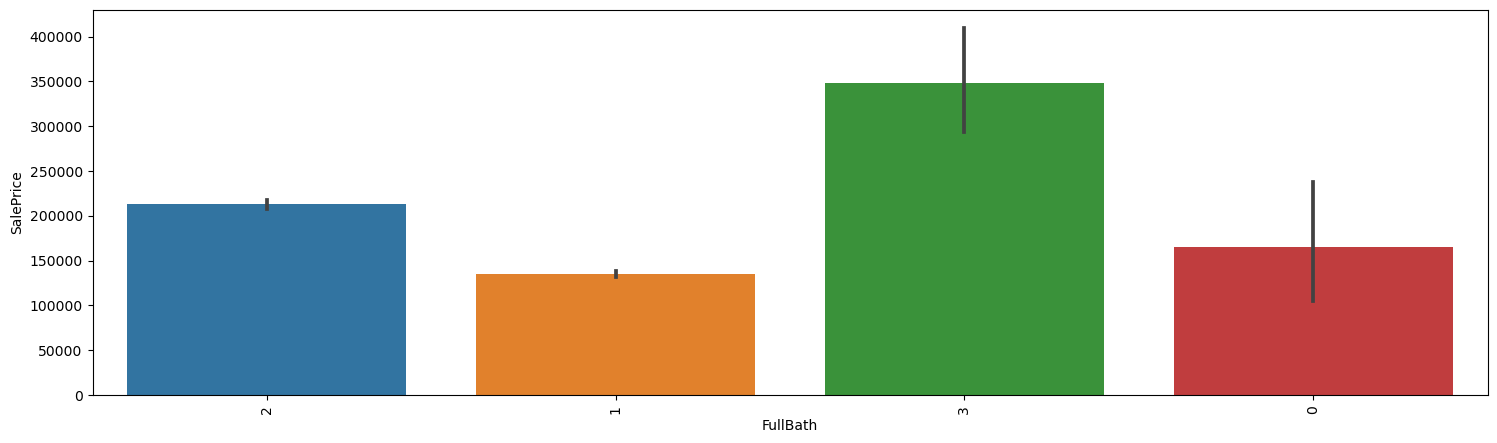

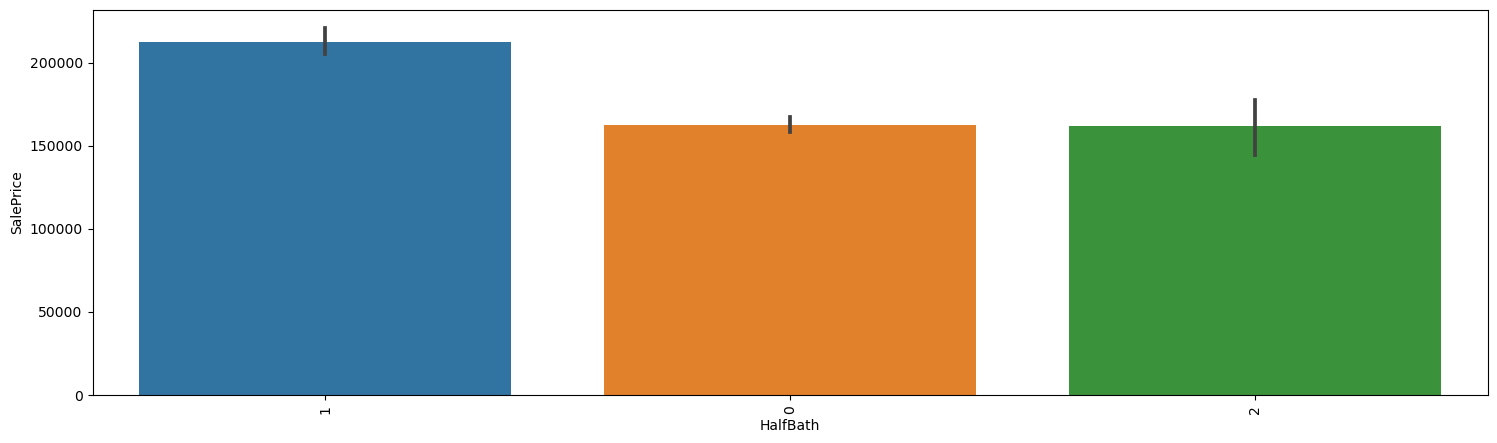

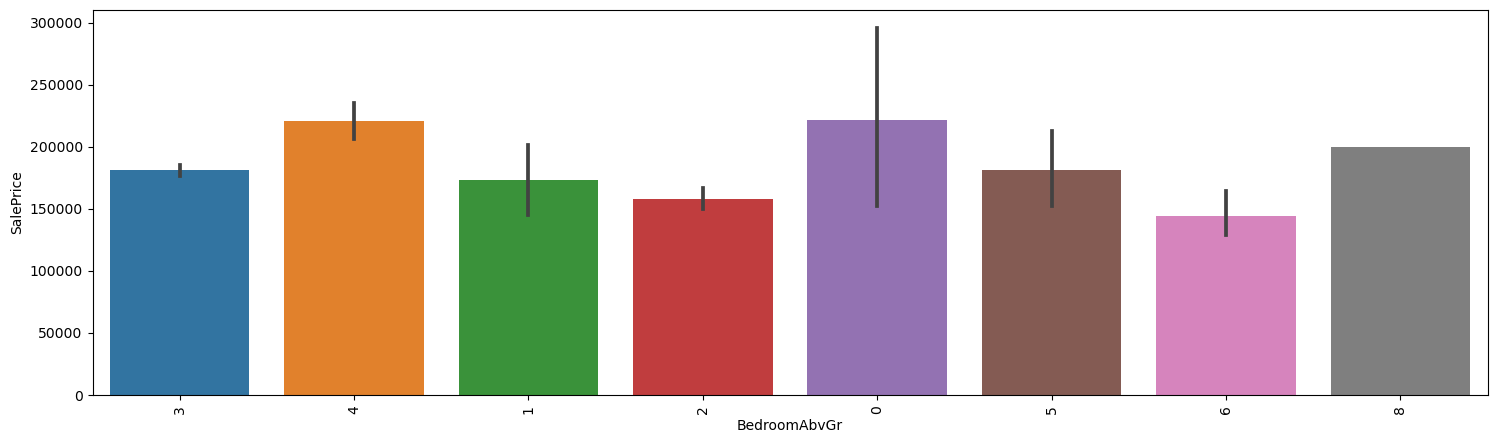

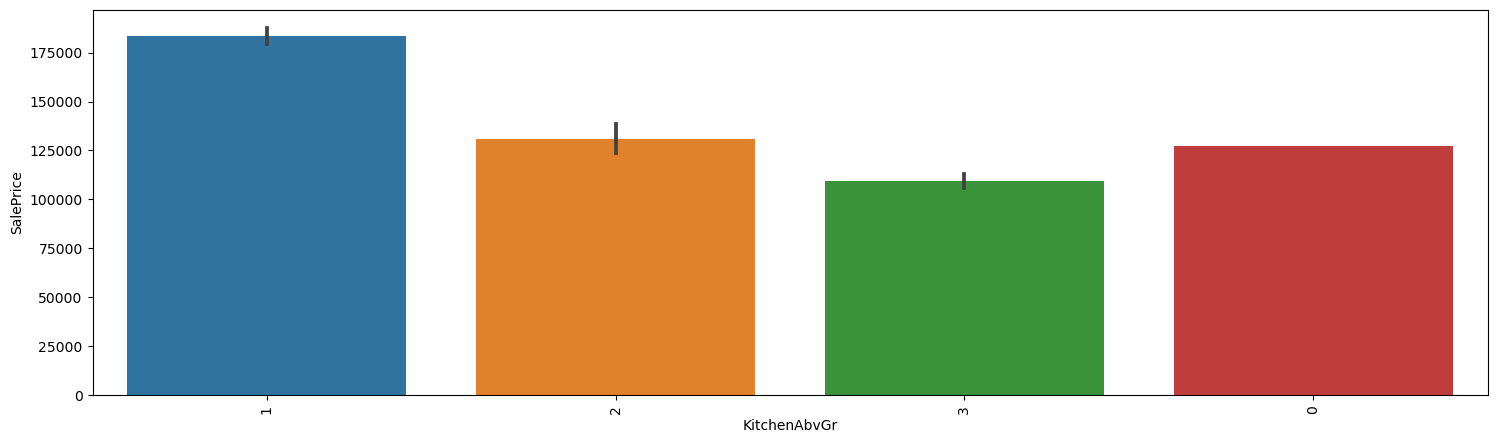

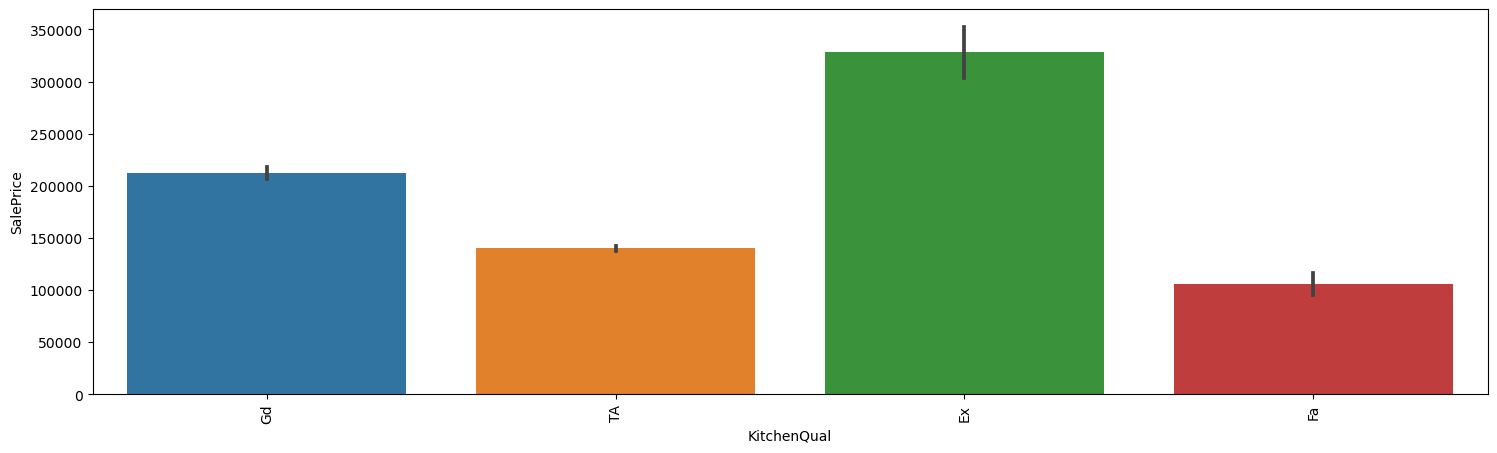

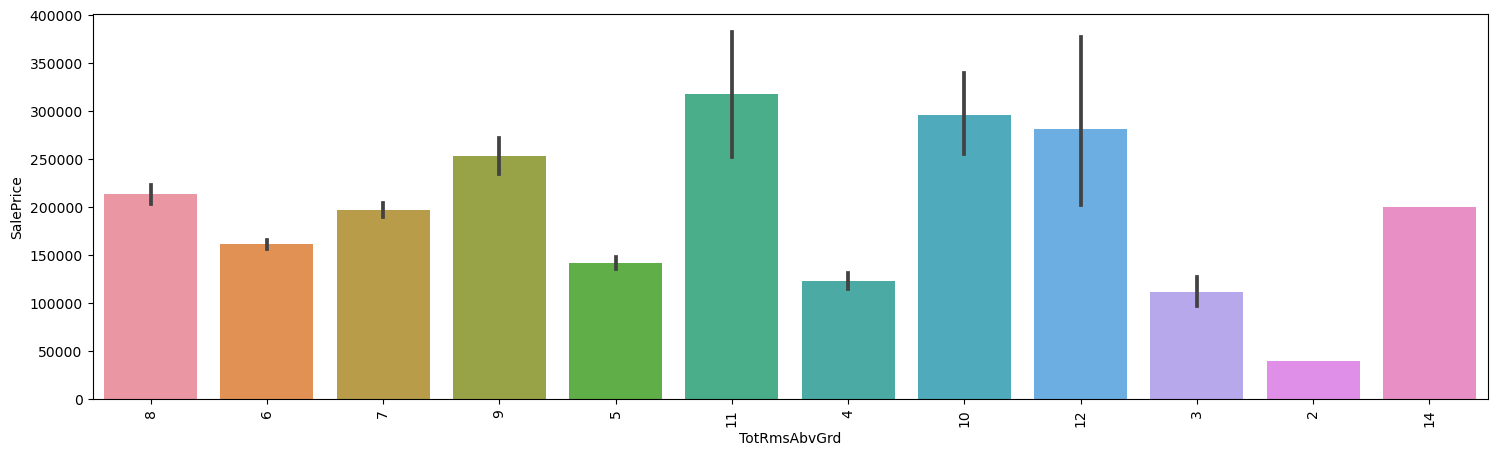

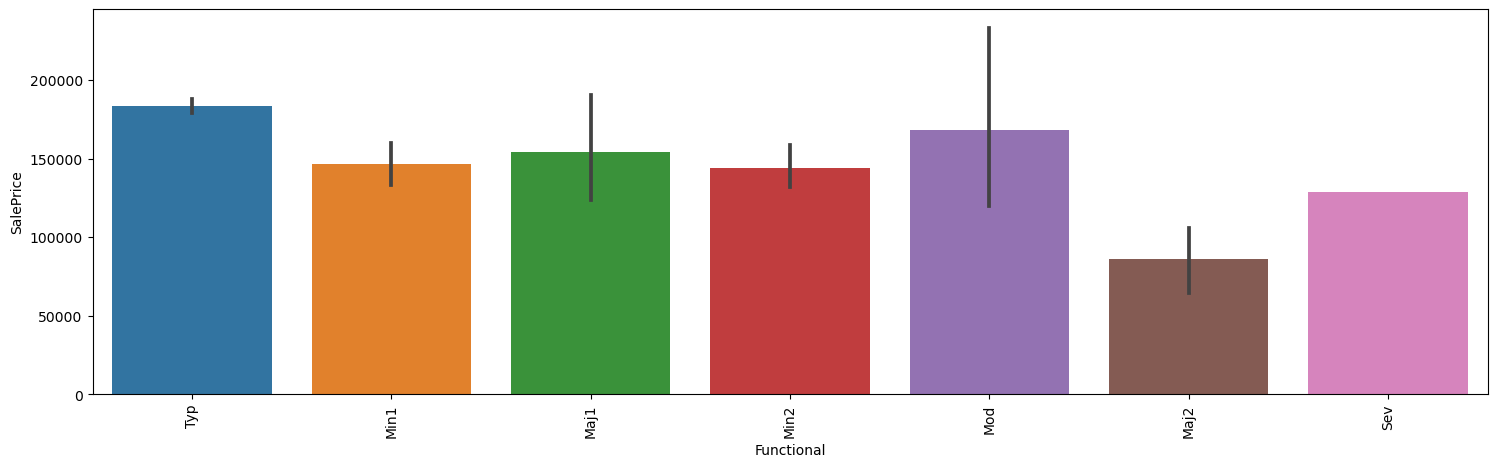

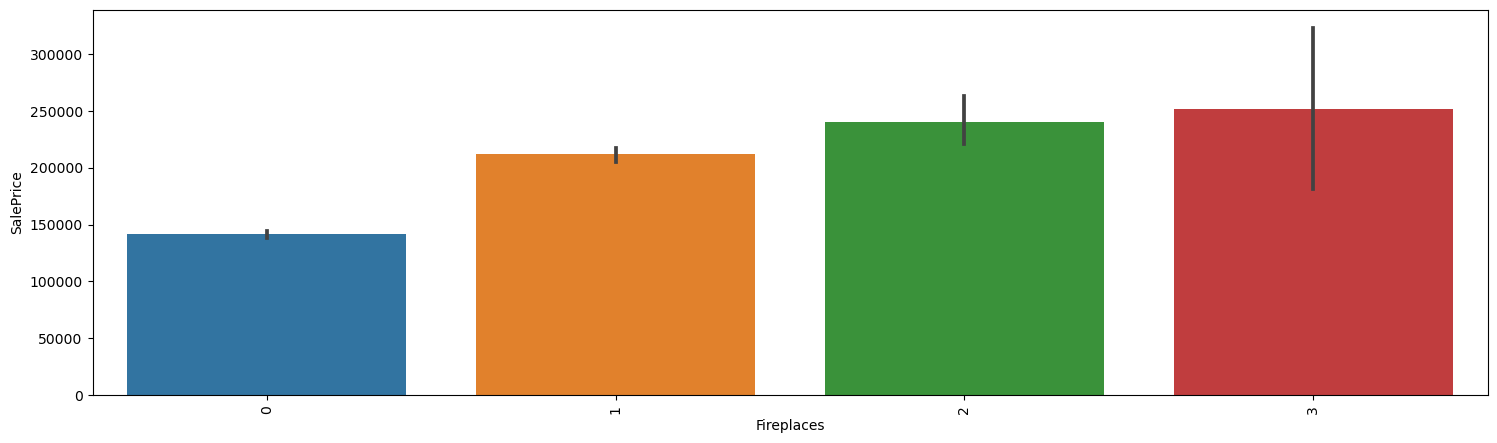

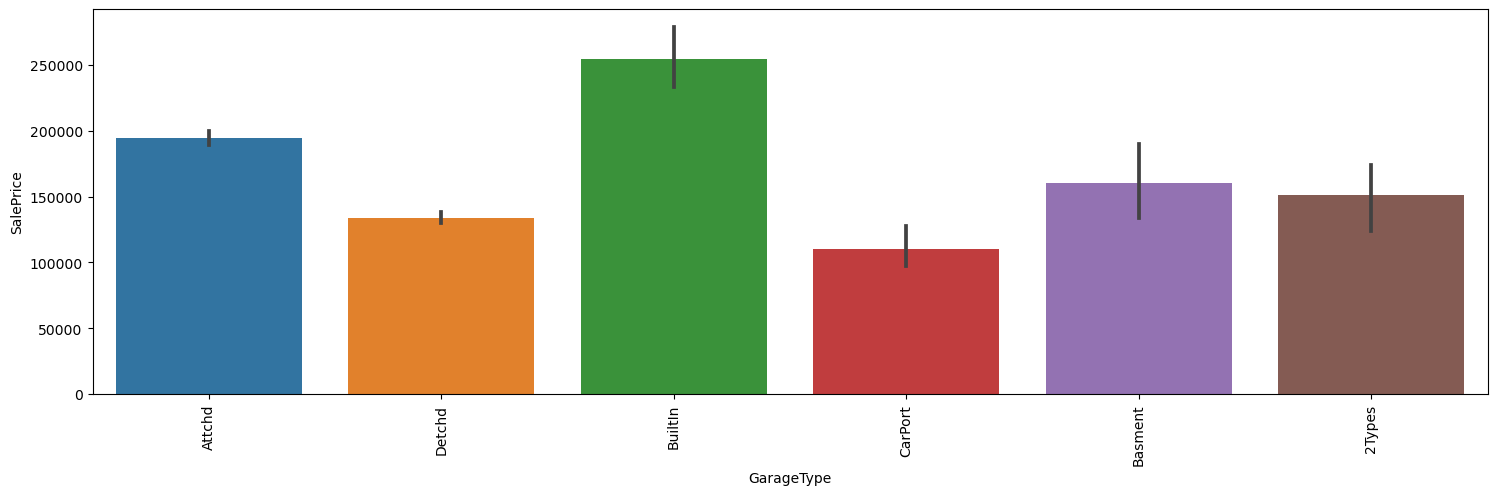

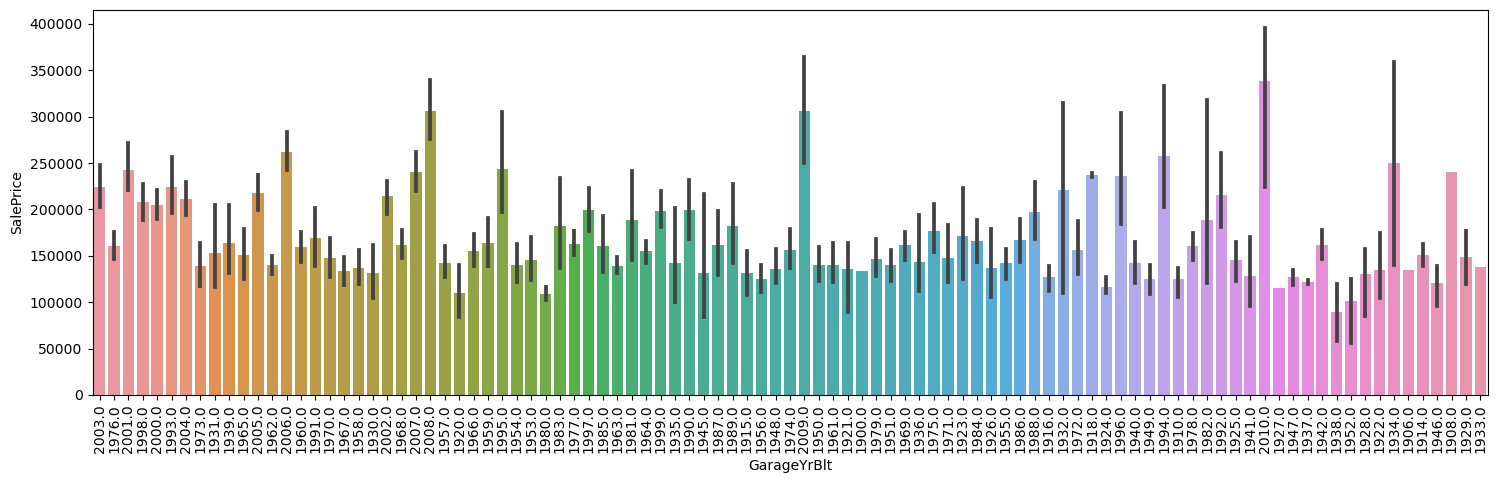

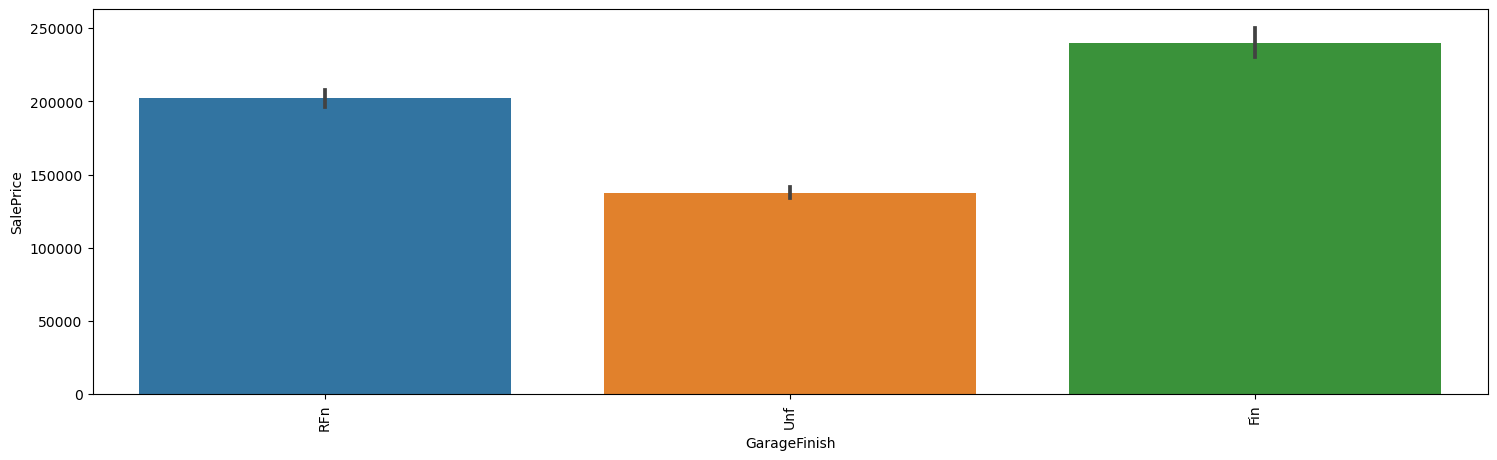

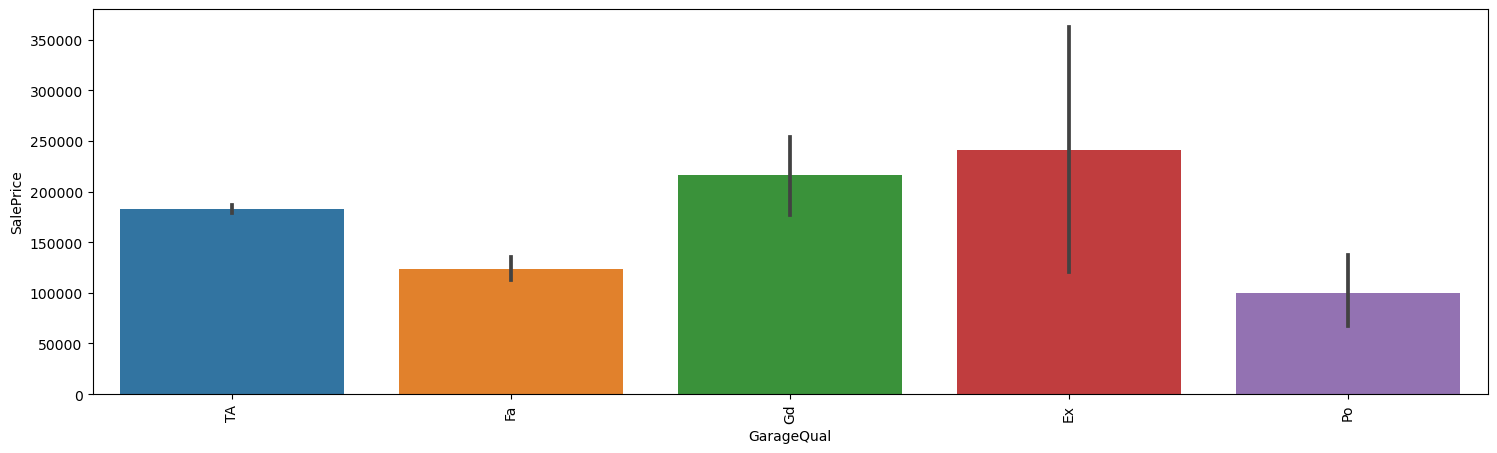

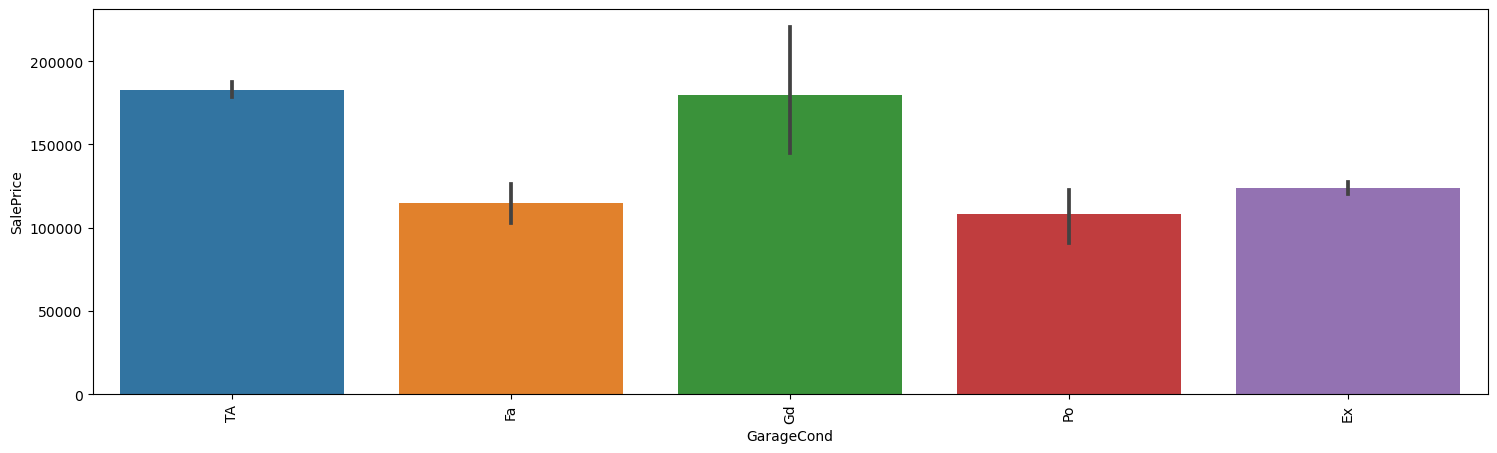

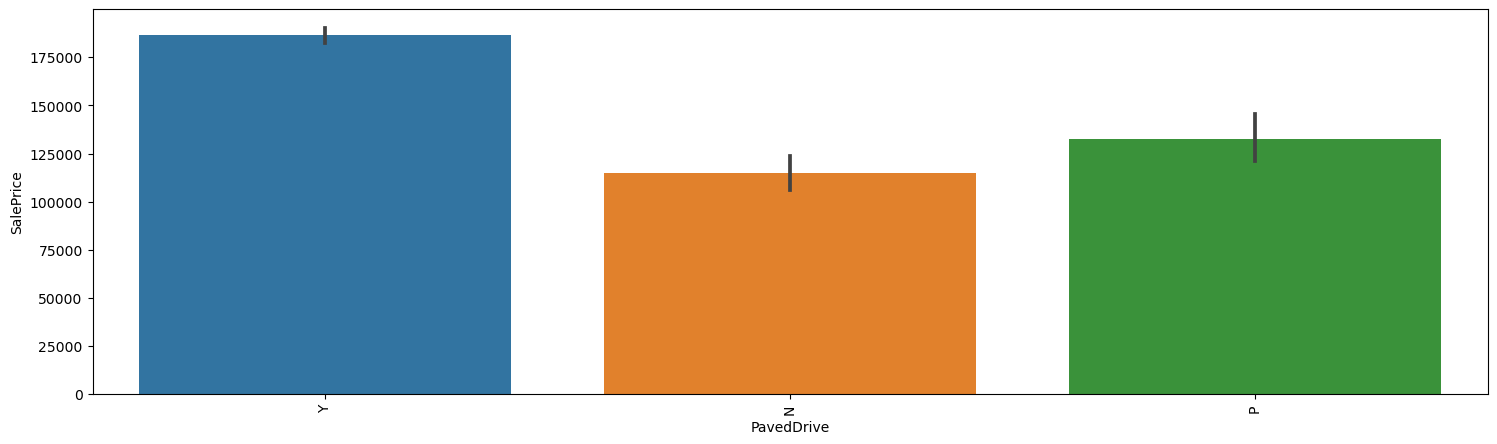

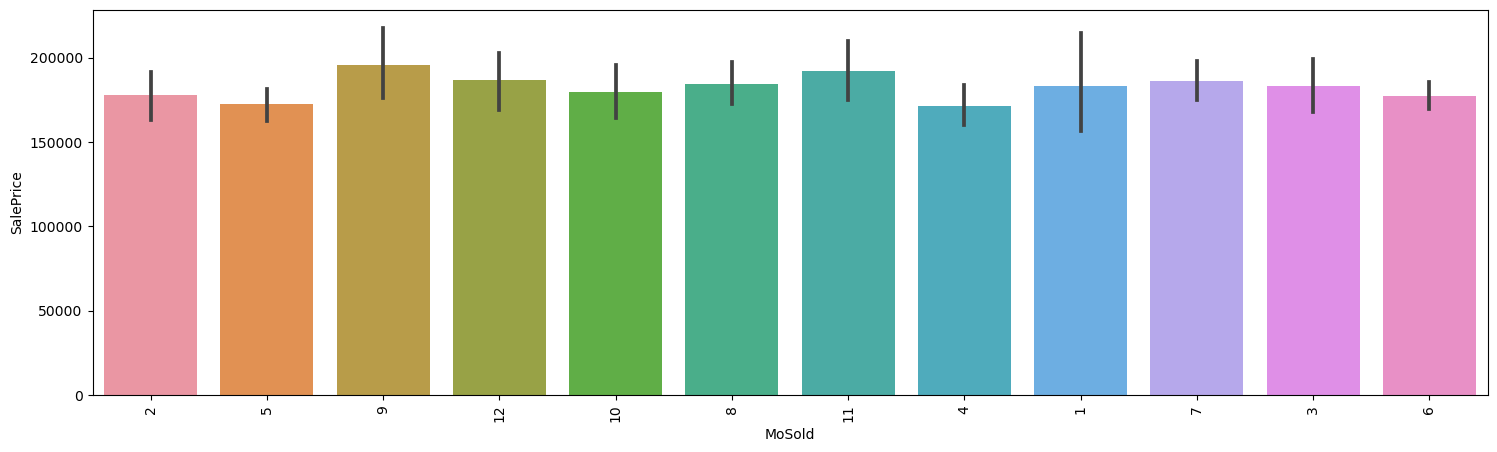

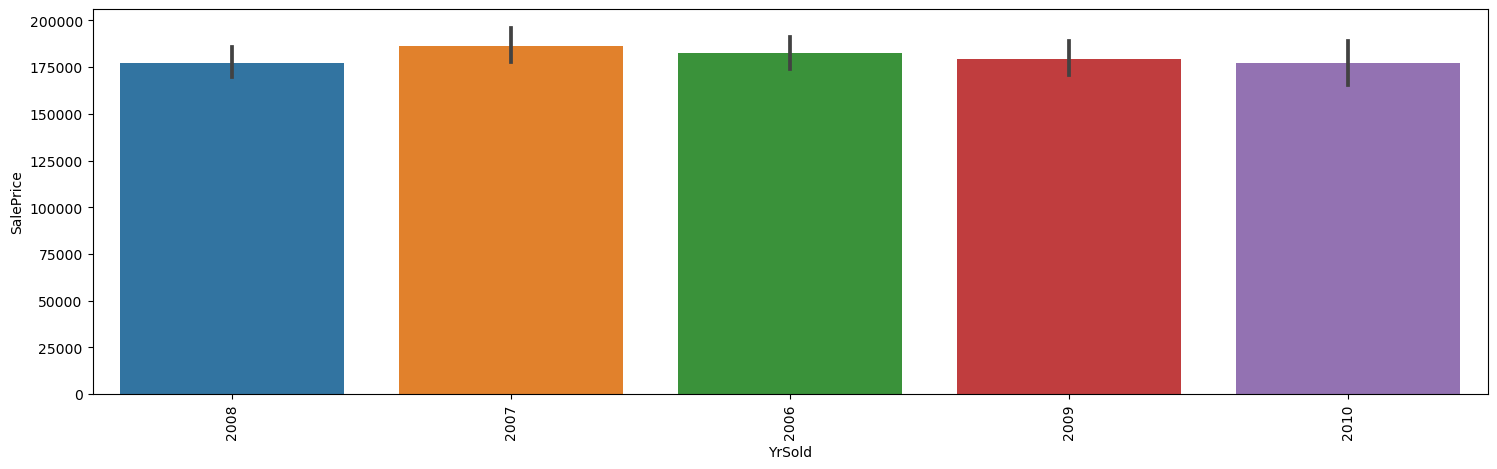

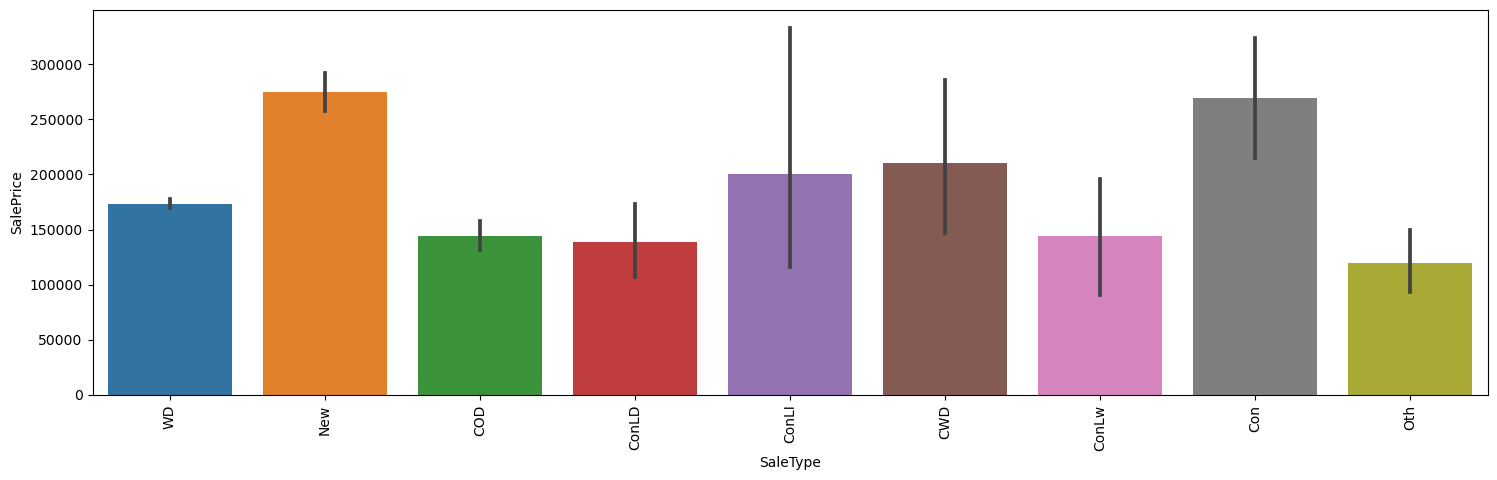

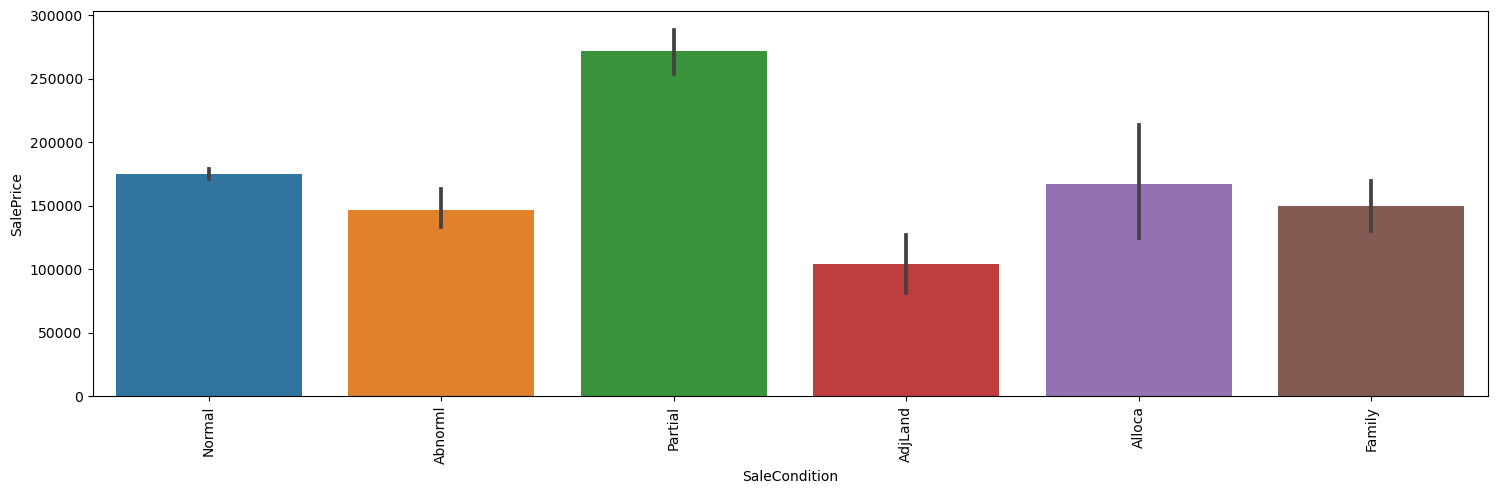

In [156]:
for col in train_df.select_dtypes(exclude=['int64','float64']):
    plt.figure(figsize =(18,5))
    plt.xticks(rotation = 90)
    sns.barplot(x = col, y= train_df['SalePrice'],data = train_df)     
    plt.show()

- Scatterplot for all the continuous columns with the dependent variable.

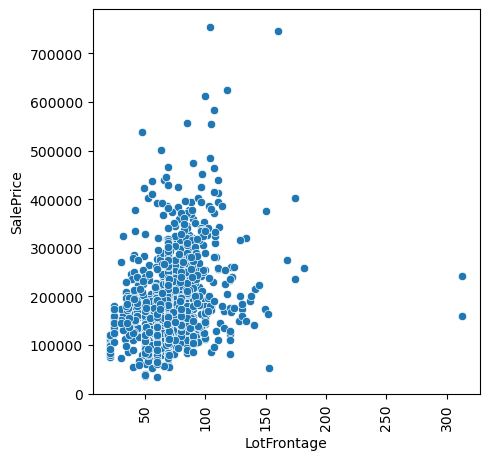

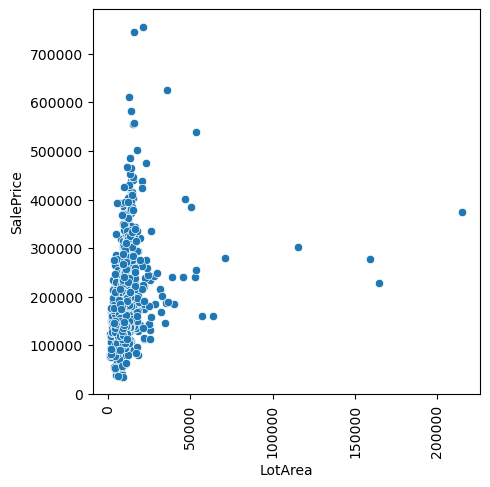

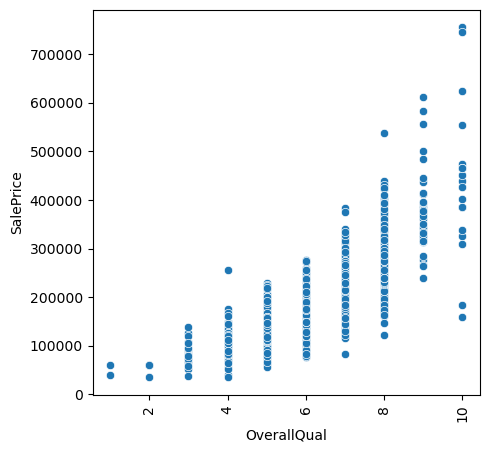

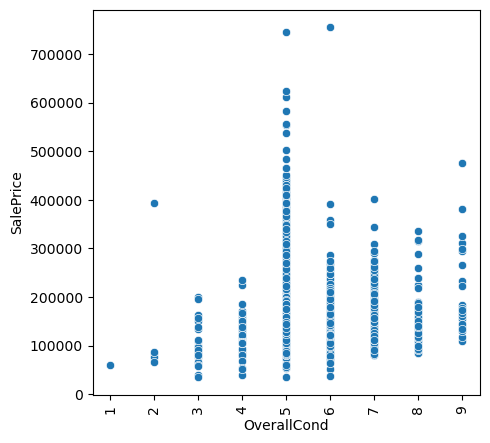

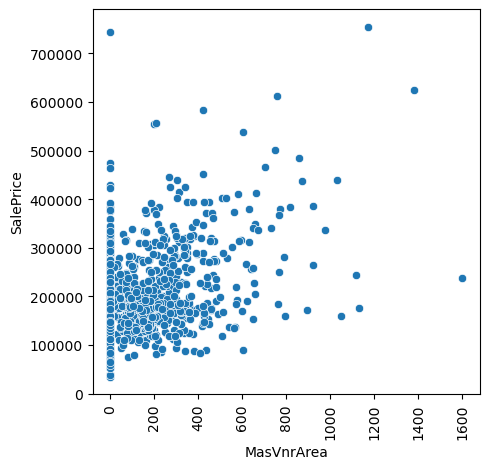

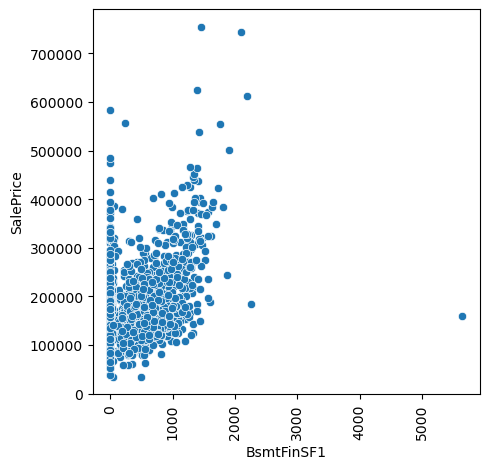

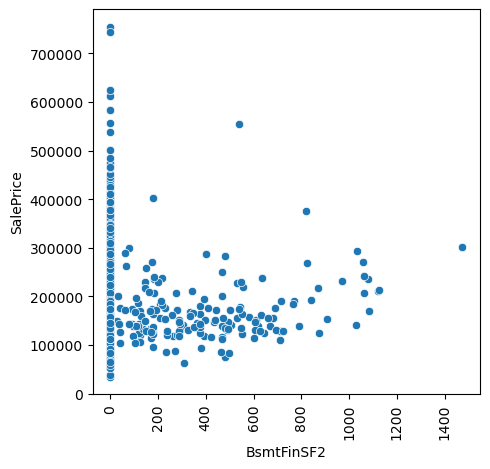

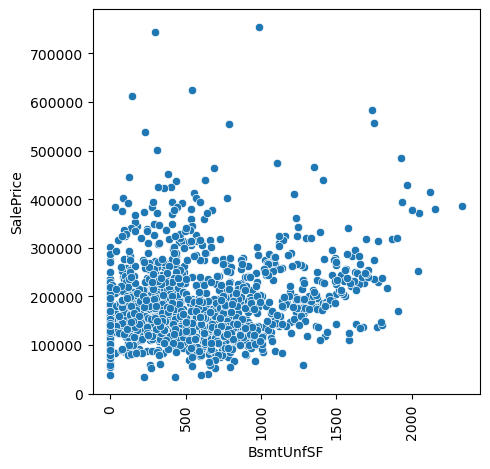

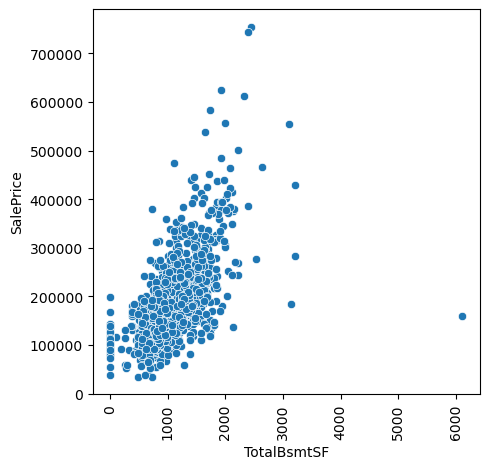

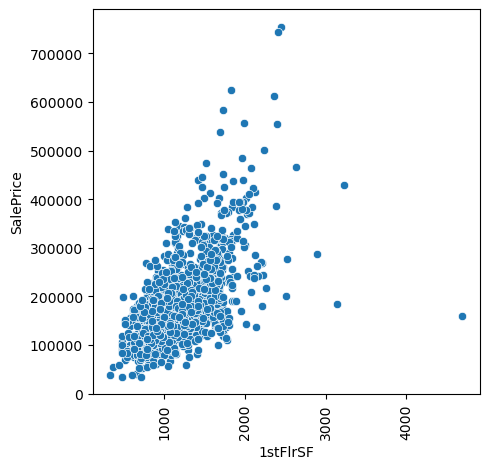

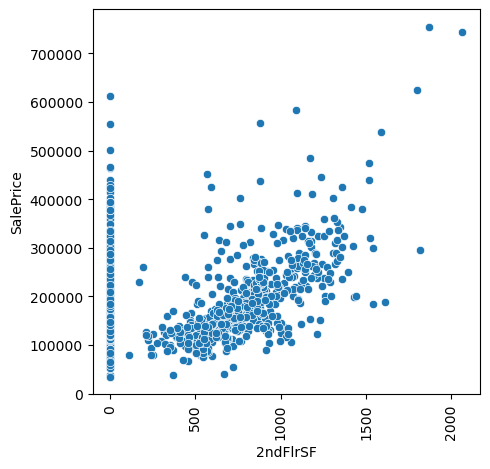

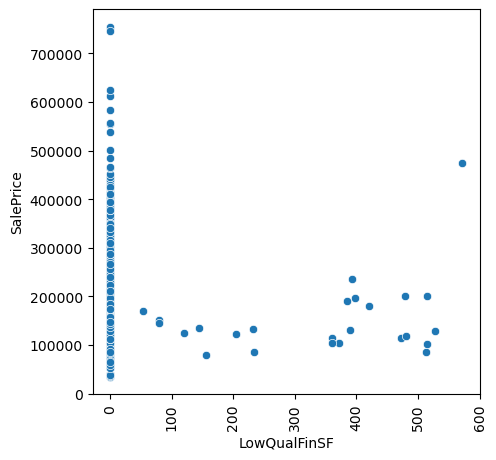

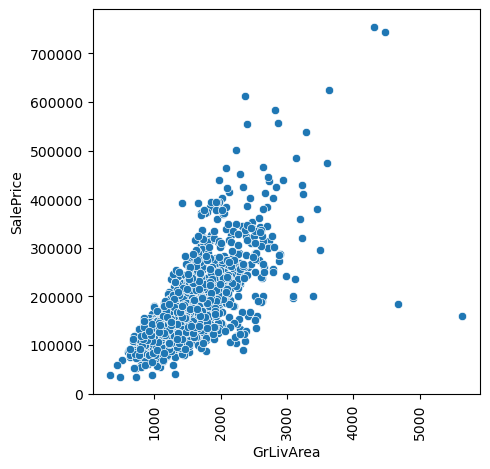

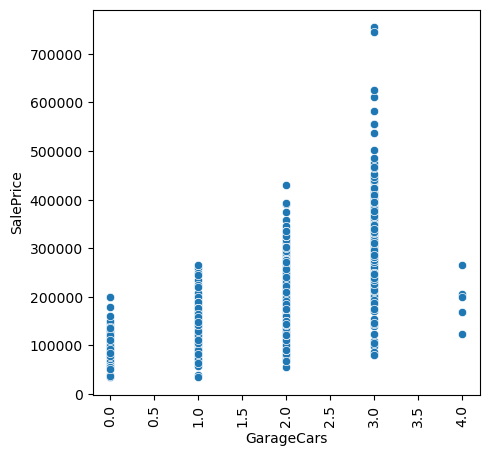

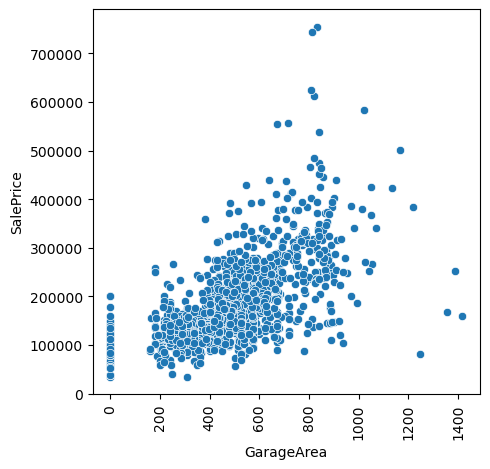

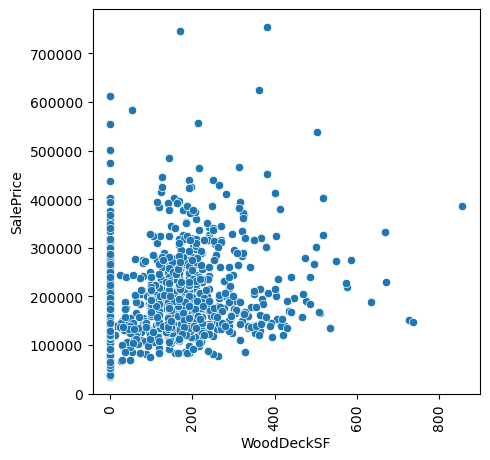

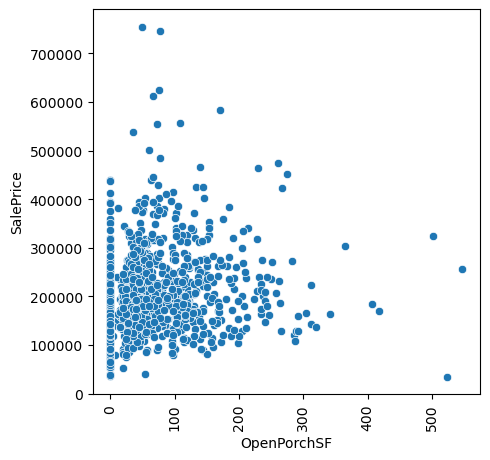

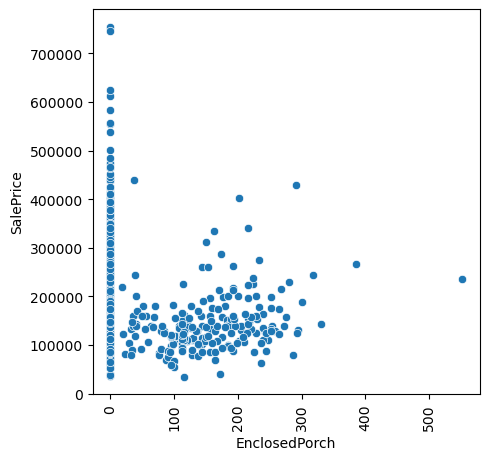

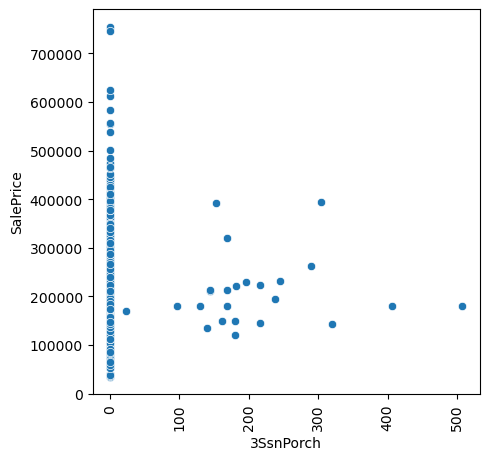

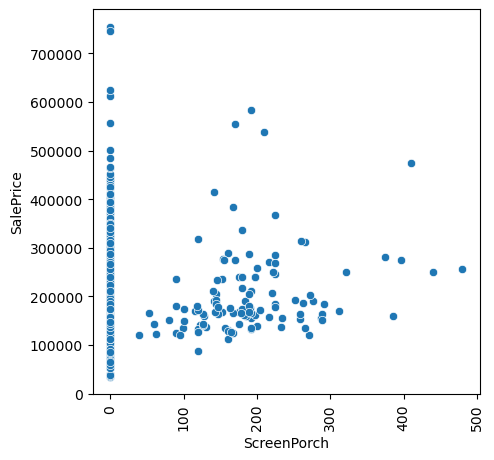

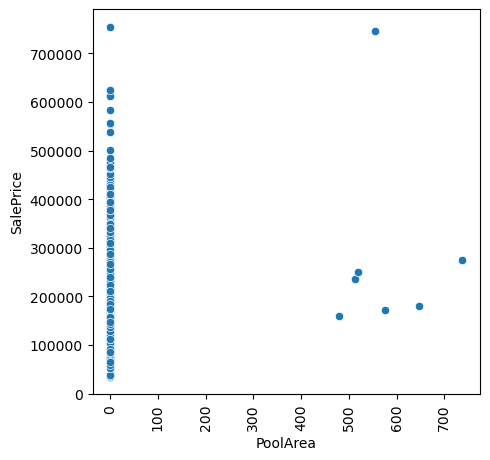

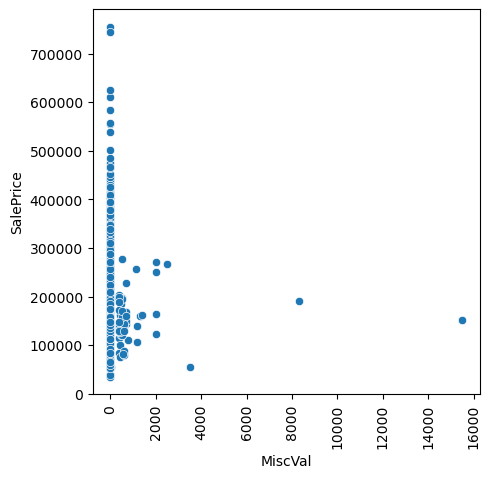

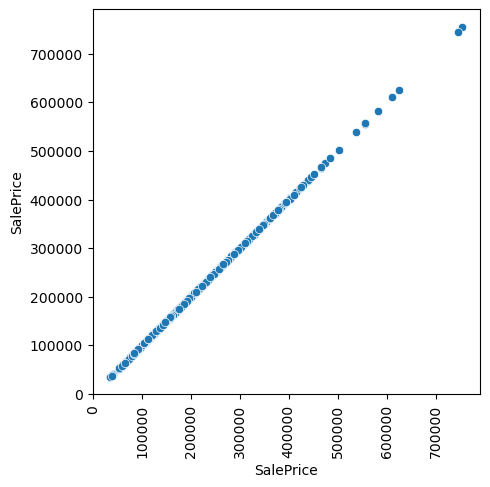

In [157]:
for col in train_df.select_dtypes(exclude= 'object'):
    plt.figure(figsize =(5,5))
    plt.xticks(rotation = 90)
    sns.scatterplot(x = col, y= train_df['SalePrice'],data = train_df)     
    plt.show()

##### Statistical Test for all the columns

- Shapiro test and KS test used for normality check on dependent variable.

In [158]:
from scipy.stats import shapiro,kstest

print(shapiro(train_df['SalePrice']))         ## --------> shapiro

print(kstest(train_df['SalePrice'], 'norm'))  ## --------> Kruskal


ShapiroResult(statistic=0.869672954082489, pvalue=3.2072044604461286e-33)
KstestResult(statistic=1.0, pvalue=0.0)


- Both Pvalue are < 0.05 so there is no normality in dependent variable.

- Here we using different kind of test to check on independent variable to see there is significant variance in dependent variable.

In [159]:
from scipy.stats import kruskal,mannwhitneyu

                         #### This below code for categorical Variable ####

count = 0
list1 = []   

for col in train_df.select_dtypes(exclude=['int64','float64']):
    
    if train_df[col].nunique() > 2:
        es1 = 'result=kruskal('
    else:
        es1 = 'result=mannwhitneyu('
    for i in train_df[col].unique():
        globals()[f"data_{i.replace(' ','').replace('(','').replace(')','').replace('.','').replace('&','')}"] = train_df['SalePrice'][train_df[col] == i]
        es1 += f"data_{i.replace(' ','').replace('(','').replace(')','').replace('.','').replace('&','')}, "
    es1 += ').pvalue'
    
    
    output = locals()
    
    exec(es1, {},output)
    
    result = output['result']
    
    if result > 0.05:
        pass
    else:
        print(count,col, result)
        list1.append(col)
        count+=1  

print(list1)

0 MSSubClass 1.8968600448434124e-104
1 MSZoning 3.0807239995999556e-57
2 LotShape 1.6403232738441862e-32
3 LandContour 1.0479232964716673e-07
4 LotConfig 3.297912123318503e-07
5 Neighborhood 6.696799031735812e-168
6 Condition1 6.492599567606712e-13
7 Condition2 0.013031585671629023
8 BldgType 2.500857956442707e-14
9 HouseStyle 1.3885066980303377e-36
10 YearBuilt 4.801112022197088e-103
11 YearRemodAdd 7.464628535721911e-84
12 RoofStyle 1.5807327219164252e-07
13 RoofMatl 0.008597464371448
14 Exterior1st 1.6944856533946873e-56
15 Exterior2nd 1.0476359663623384e-51
16 MasVnrType 2.0587312313534828e-58
17 ExterQual 8.180798192071324e-148
18 ExterCond 1.8323647163959772e-09
19 Foundation 2.169096402016262e-103
20 BsmtQual 1.6125417961934586e-142
21 BsmtCond 3.504682858613018e-13
22 BsmtExposure 9.564555100934035e-33
23 BsmtFinType1 5.735444021973994e-64
24 Heating 3.3312797209470924e-06
25 HeatingQC 6.036448505067046e-76
26 CentralAir 5.3277134372271244e-33
27 Electrical 1.8503516261173737e-

In [160]:
import statsmodels.formula.api as smf


for col in train_df.select_dtypes(exclude= 'object'):

    train_df = train_df.rename(columns={'1stFlrSF':"FirstFlrSF",'2ndFlrSF':'SecondFlrSF','3SsnPorch':'ThirdSsnPorch'})
    list2 = []
    for col in train_df.select_dtypes(exclude='object').columns:
        result = smf.ols(formula=f'{col} ~ SalePrice', data=train_df).fit()
        
        if result.rsquared < 0.14:
            pass
        else:
            list2.append(col)
            
print(list2)

['OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'SalePrice']


In [161]:
list1.extend(list2)

- List1 variable contains the columns of dataset which filtered by statistical method.
- Using list1 variable to create a new dataframe which going to be use in future.


In [162]:
df1 = pd.DataFrame(train_df[list1])

In [163]:
df1

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,GasA,Ex,Y,SBrkr,1,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,TA,TA,Y,WD,Normal,7,196.0,706,856,856,1710,2,548,208500
2,20,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,GasA,Ex,Y,SBrkr,0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,TA,TA,Y,WD,Normal,6,0.0,978,1262,1262,1262,2,460,181500
3,60,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,GasA,Ex,Y,SBrkr,1,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,TA,TA,Y,WD,Normal,7,162.0,486,920,920,1786,2,608,223500
4,70,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,GasA,Gd,Y,SBrkr,1,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,TA,TA,Y,WD,Abnorml,7,0.0,216,756,961,1717,3,642,140000
5,60,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,GasA,Ex,Y,SBrkr,1,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,TA,TA,Y,WD,Normal,8,350.0,655,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,Reg,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,GasA,Ex,Y,SBrkr,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,TA,TA,Y,WD,Normal,6,0.0,0,953,953,1647,2,460,175000
1457,20,RL,Reg,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,GasA,TA,Y,SBrkr,1,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,TA,TA,Y,WD,Normal,6,119.0,790,1542,2073,2073,2,500,210000
1458,70,RL,Reg,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,GasA,Ex,Y,SBrkr,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,TA,TA,Y,WD,Normal,7,0.0,275,1152,1188,2340,1,252,266500


### Outlier Treatment

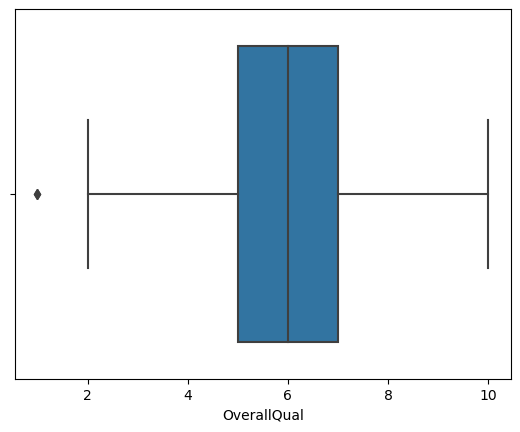

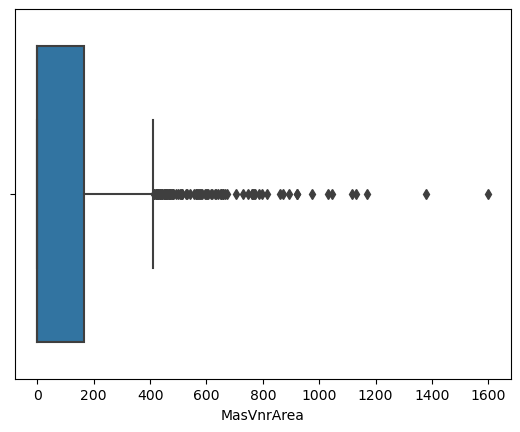

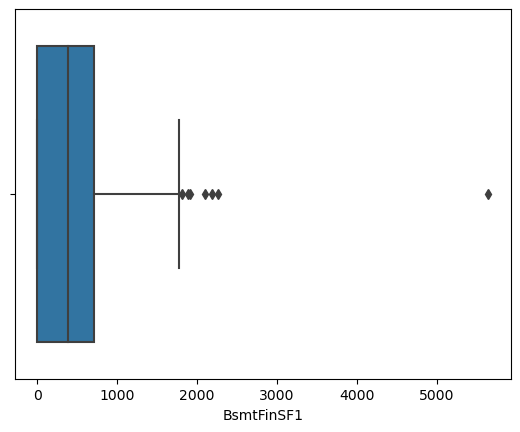

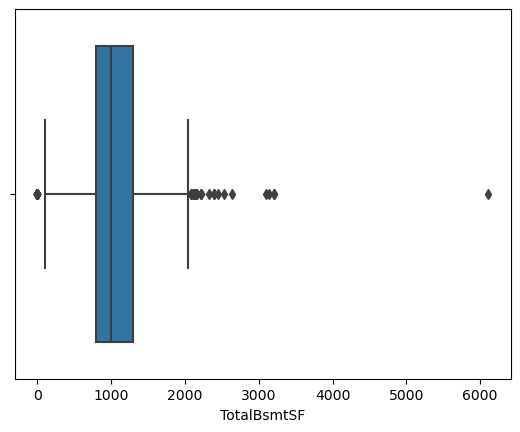

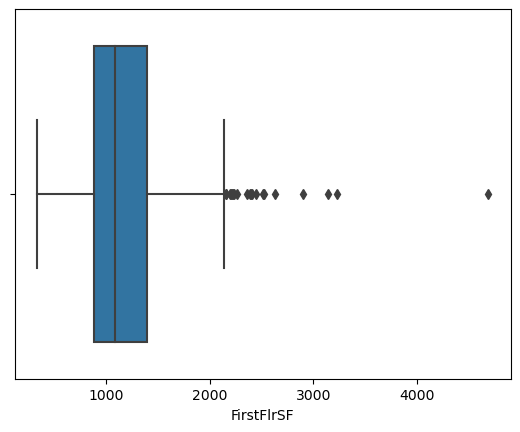

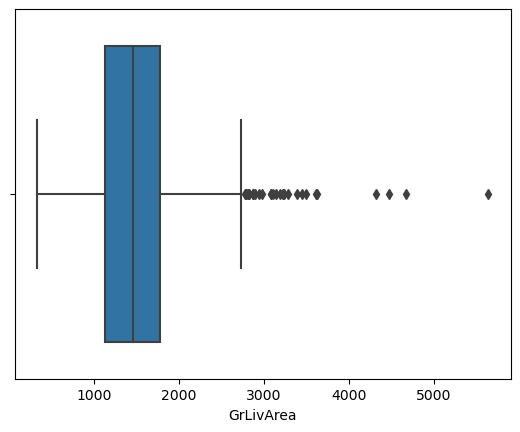

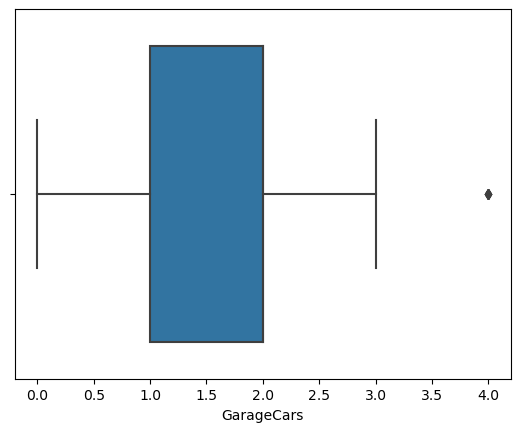

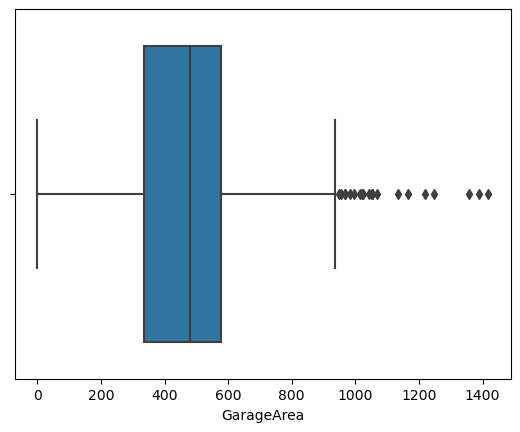

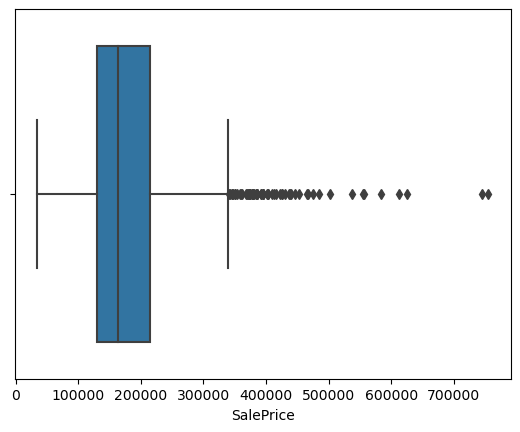

In [164]:
                               ## Checking the outlier in continuous columns ## 
                                     ### Before Outliers ###

for col in  df1.select_dtypes(exclude= 'object'):
    sns.boxplot(x = col,data = df1)     
    plt.show()

In [165]:
for i in  df1.select_dtypes(exclude= 'object'):
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3 - q1
    
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    
    if df1[~df1[i].between(ll,ul)].shape[0]/df1.shape[0] >0.02:
        df1.loc[df1[i] < ll,i] = ll
        df1.loc[df1[i] > ul,i] = ul
    else:
        df1 = df1[df1[i].between(ll,ul)]

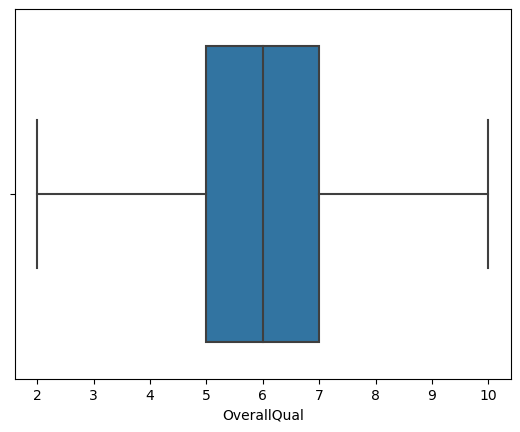

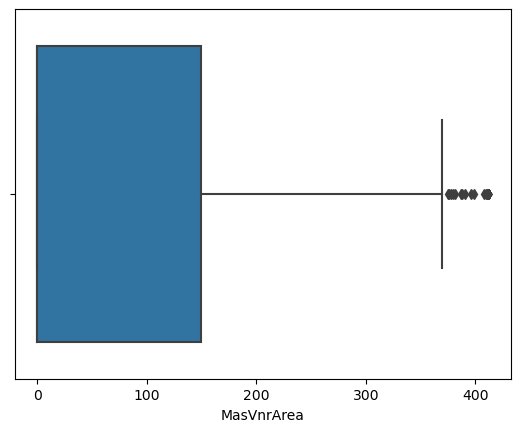

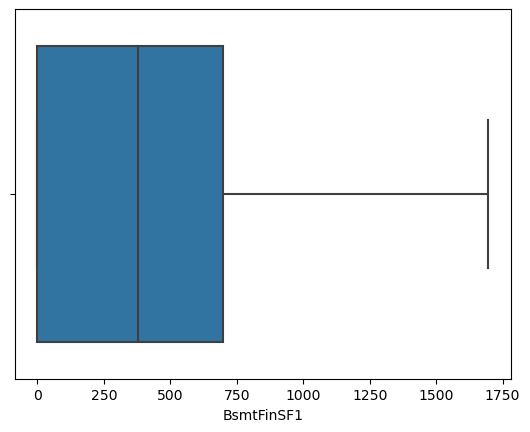

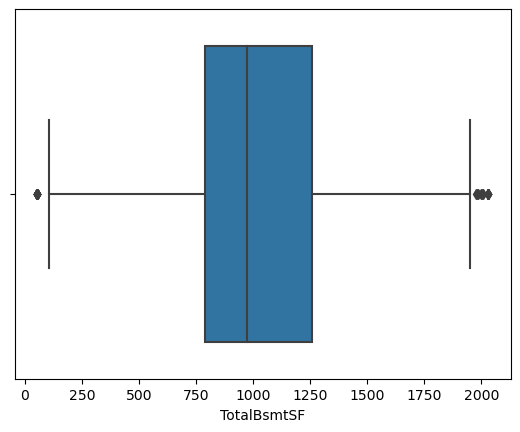

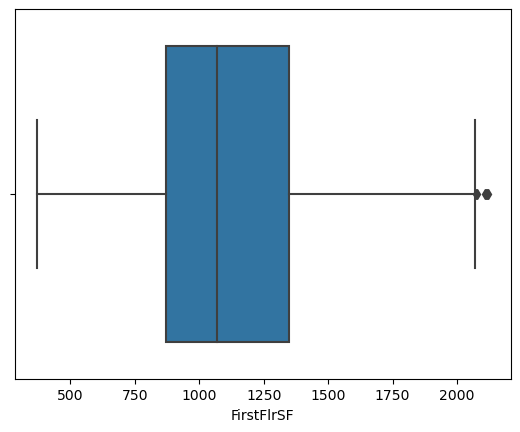

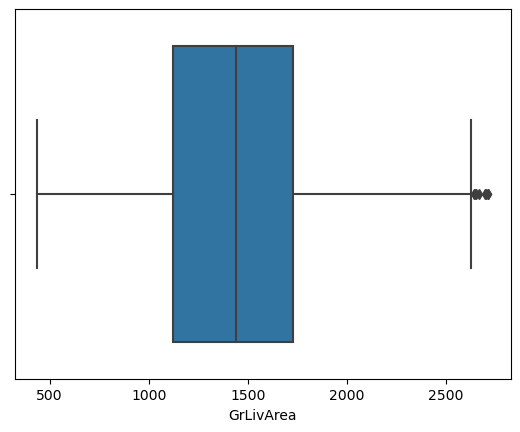

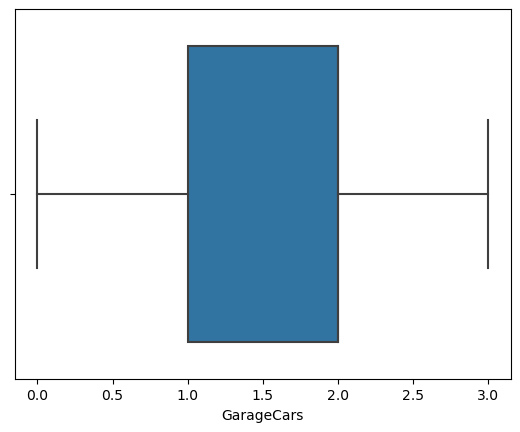

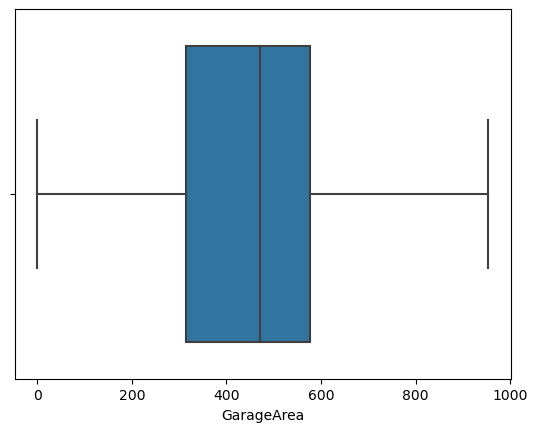

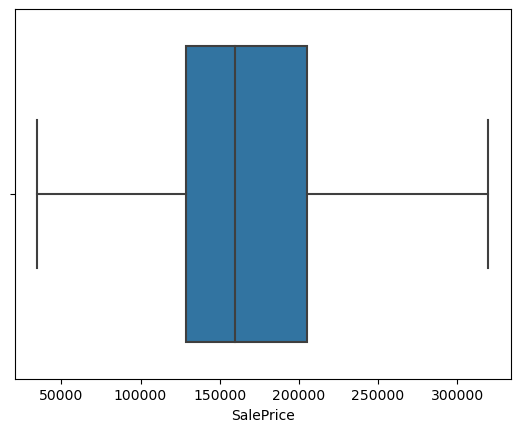

In [166]:
                                     ### After Outliers ###

for col in  df1.select_dtypes(exclude= 'object'):
    sns.boxplot(x = col,data = df1)     
    plt.show()

## Encoding

#### Label Encoding

- Using apply() function to do the manual encoding for selected columns.

In [167]:
df1['ExterQual'] = df1['ExterQual'].apply(lambda x: 0 if x == 'Fa' else 1 if x == 'TA' else 2 if x=='Gd' else 3)

df1['LotShape']=df1['LotShape'].apply(lambda x: 0 if x == 'Reg' else 1 if x == 'IR1' else 2 if x=='IR2' else 3)

df1['ExterCond']=df1['ExterCond'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3 if x== 'Gd' else 4)

df1['BsmtQual']=df1['BsmtQual'].apply(lambda x: 0 if x == 'Fa' else 1 if x == 'TA' else 2 if x=='Gd' else 3)

df1['BsmtCond']=df1['BsmtCond'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3)

df1['BsmtExposure']=df1['BsmtExposure'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Mn' else 2 if x=='Av' else 3)

df1['BsmtFinType1']=df1['BsmtFinType1'].apply(lambda x: 0 if x == 'Unf' else 1 if x == 'LwQ' else 2 if x=='Rec' else 3 if x== 'BLQ' else 4 if x=='ALQ' else 5)

df1['HeatingQC']=df1['HeatingQC'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3 if x== 'Gd' else 4)

df1['KitchenQual']=df1['KitchenQual'].apply(lambda x: 0 if x == 'Fa' else 1 if x == 'TA' else 2 if x=='Gd' else 3)

df1['GarageQual']=df1['GarageQual'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3 if x== 'Gd' else 4)

df1['GarageCond']=df1['GarageCond'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3 if x== 'Gd' else 4)

##### One Hot Encoding

- using Pandas function get_dummies to encoding the columns.

In [168]:
df1 = pd.concat([df1[['SalePrice','MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea',
                'LotShape','ExterQual',
                'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC',
                'KitchenQual','GarageQual','GarageCond']],
                pd.get_dummies(df1.drop(['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'GarageCars', 
                                         'GarageArea','SalePrice','LotShape','ExterQual',
                                        'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC',
                                        'KitchenQual','GarageQual','GarageCond'],axis =1 ),drop_first=True)],axis =1)
df1.columns

Index(['SalePrice', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'FirstFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea', 'LotShape', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=474)

- Splitting the data for train_test_split from df1.

In [169]:
X = df1.drop('SalePrice',axis =1)
y = df1['SalePrice']

In [170]:
y

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1392, dtype: float64

## Importing Test Dataset

- In test dataset also will do the same procedure as done in train dataset.

In [171]:
test_df = pd.read_csv('./test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [172]:
a = test_df['Id']
test_df = test_df.drop('Id',axis =1)

- Going do the missing values in test dataset.

In [173]:
              ## This is for Object column ##

for i in test_df.select_dtypes(include = 'object').columns:
    if test_df[i].isna().sum()/test_df.shape[0] < 0.20:
        test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
    else:
        test_df = test_df.drop(i, axis =1)

                          ## This is for Int and Float column ##

for i in test_df.select_dtypes(exclude = 'object').columns:
    if test_df[i].isna().sum()/test_df.shape[0] < 0.20:
        test_df[i] = test_df[i].fillna(test_df[i].median())
    else:
        test_df = test_df.drop(i,axis =1)

In [174]:
test_df[['YearBuilt','YearRemodAdd',"MSSubClass","BsmtFullBath",'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','MoSold','YrSold']] = test_df[['YearBuilt','YearRemodAdd',"MSSubClass","BsmtFullBath",'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','MoSold','YrSold']].astype(str)

test_df = test_df.rename(columns={'1stFlrSF':"FirstFlrSF",'2ndFlrSF':'SecondFlrSF','3SsnPorch':'ThirdSsnPorch'})

In [175]:
test_list = list1
test_list.pop()
df2 = pd.DataFrame(test_df[test_list])

- As done in train dataset same encoding procedure will be done in test dataset.

In [176]:
df2['ExterQual'] = df2['ExterQual'].apply(lambda x: 0 if x == 'Fa' else 1 if x == 'TA' else 2 if x=='Gd' else 3)

df2['LotShape']=df2['LotShape'].apply(lambda x: 0 if x == 'Reg' else 1 if x == 'IR1' else 2 if x=='IR2' else 3)

df2['ExterCond']=df2['ExterCond'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3 if x== 'Gd' else 4)

df2['BsmtQual']=df2['BsmtQual'].apply(lambda x: 0 if x == 'Fa' else 1 if x == 'TA' else 2 if x=='Gd' else 3)

df2['BsmtCond']=df2['BsmtCond'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3)

df2['BsmtExposure']=df2['BsmtExposure'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Mn' else 2 if x=='Av' else 3)

df2['BsmtFinType1']=df2['BsmtFinType1'].apply(lambda x: 0 if x == 'Unf' else 1 if x == 'LwQ' else 2 if x=='Rec' else 3 if x== 'BLQ' else 4 if x=='ALQ' else 5)

df2['HeatingQC']=df2['HeatingQC'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3 if x== 'Gd' else 4)

df2['KitchenQual']=df2['KitchenQual'].apply(lambda x: 0 if x == 'Fa' else 1 if x == 'TA' else 2 if x=='Gd' else 3)

df2['GarageQual']=df2['GarageQual'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3 if x== 'Gd' else 4)

df2['GarageCond']=df2['GarageCond'].apply(lambda x: 0 if x == 'Po' else 1 if x == 'Fa' else 2 if x=='TA' else 3 if x== 'Gd' else 4)

In [177]:
df2 = pd.concat([df2[['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea',
                'LotShape','ExterQual',
                'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC',
                'KitchenQual','GarageQual','GarageCond']],
                pd.get_dummies(df2.drop(['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'GarageCars', 
                                         'GarageArea','LotShape','ExterQual',
                                        'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC',
                                        'KitchenQual','GarageQual','GarageCond'],axis =1 ),drop_first=True)],axis =1)

In [178]:
b = [col for col in X.columns if col not in df2.columns]

df2[b] = 0

In [179]:
c= [col for col in df2.columns if col not in X.columns]

df2 = df2.drop(c,axis = 1)

[col for col in df2.columns if col not in X.columns]

[]

In [180]:
df2.shape

(1459, 473)

## Feature Transformation

- Feature transformation split the data using train_test_split.
- Then use Standard Scaler function to standardize the data values into a standard format.

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [182]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Base Model

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

###### Linear Regression

In [184]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predlr= lr.predict(X_test)

cvslr = cross_val_score(lr,X,y,cv = 5,scoring= 'neg_mean_squared_error',n_jobs=-1)

[np.sqrt(abs(ele)) for ele in cvslr]

[26352.18593547777,
 26132.30547721288,
 26603.102799153203,
 21993.91025375314,
 3285511980260.1265]

##### Decision Tree 

In [185]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_preddt = dt.predict(X_test)

cvsdt = cross_val_score(dt,X,y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

[np.sqrt(abs(ele)) for ele in cvsdt]

[30774.7396321884,
 30992.595077964455,
 30936.098614525312,
 26895.706232414363,
 31532.54393756846]

##### Random Forest

In [186]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_predrf = rf.predict(X_test)

cvsrf = cross_val_score(rf,X,y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

[np.sqrt(abs(ele)) for ele in cvsrf]

[22492.274755392868,
 20173.298118561954,
 21614.247255783514,
 19016.505374977623,
 23147.154705630972]

##### Gradient Boost

In [187]:
gd = GradientBoostingRegressor()
gd.fit(X_train,y_train)
y_predgd = gd.predict(X_test)

cvsgd = cross_val_score(gd,X,y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

[np.sqrt(abs(ele)) for ele in cvsgd]

[18860.751616049376,
 19043.41719086124,
 20432.06597849646,
 17543.456675373807,
 20999.61565138965]

##### Ada Boost

In [188]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
y_predada = ada.predict(X_test)

cvsada = cross_val_score(ada,X,y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

[np.sqrt(abs(ele)) for ele in cvsada]

[25272.40400534711,
 24520.179462291057,
 25643.366018850207,
 23882.775143307685,
 24723.498240837114]

##### K Nearest 

In [189]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_predknn = knn.predict(X_test)

cvsknn = cross_val_score(knn,X,y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

[np.sqrt(abs(ele)) for ele in cvsknn]

[31759.375995730472,
 28995.952702814455,
 32202.856586516427,
 32669.51174904321,
 31767.428498383248]

##### SVR

In [190]:
sv = SVR()
sv.fit(X_train,y_train)
y_predsv = sv.predict(X_test)

cvssv = cross_val_score(sv,X,y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

[np.sqrt(abs(ele)) for ele in cvssv]

[62298.79205362111,
 68693.49788032507,
 62672.19495625533,
 58855.26187888568,
 60548.87371643064]

## Metrics

- Metrics used to find the Root Mean Squared Error - "RMSE" nad R2-Score for Regression.

In [191]:
from sklearn.metrics import mean_squared_error,r2_score

##### Linear

In [192]:
print(mean_squared_error(y_test,y_predlr,squared=False))
print(r2_score(y_test,y_predlr))

9949034368860420.0
-2.689670167132353e+22


##### Decision Tree

In [193]:
print(mean_squared_error(y_test,y_preddt,squared=False))
print(r2_score(y_test,y_preddt))

32408.141023896696
0.7146056285463398


##### Random Forest

In [194]:
print(mean_squared_error(y_test,y_predrf,squared=False))
print(r2_score(y_test,y_predrf))

23026.96583464744
0.8559177118336804


##### Gradient Boost

In [195]:
print(mean_squared_error(y_test,y_predgd,squared=False))
print(r2_score(y_test,y_predgd))

21599.88503892845
0.8732231247864016


##### Ada Boost

In [196]:
print(mean_squared_error(y_test,y_predada,squared=False))
print(r2_score(y_test,y_predada))

25342.966840675945
0.825477239264381


##### K Nearest

In [197]:
print(mean_squared_error(y_test,y_predknn,squared=False))
print(r2_score(y_test,y_predknn))

37324.606234954794
0.6214461798983664


##### SVC

In [198]:
print(mean_squared_error(y_test,y_predsv,squared=False))
print(r2_score(y_test,y_predsv))

61168.600709012586
-0.016703351297348012


## Feature Selection

- Using the RFE - Recursive Feature Elimination for finding the best columns to train in the model.
- Here again going to compare the predicted columns with RFE predicted columns.
- If both are more or less same will proceed with next steps.

In [199]:
from sklearn.feature_selection import RFE

- To do feature selection import some models from sklearn --> scikit-learn

In [200]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

In [202]:
n_features_to_select = 400
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=400)

In [203]:
predictions = rfe.predict(df2)

X has feature names, but RFE was fitted without feature names


In [204]:
predictions

array([307362.76639313, 309548.53040836, 314767.85633328, ...,
       310078.69172579, 296828.36076252, 316096.42249137])

In [205]:
output = pd.DataFrame({"Id":a, 'SalePrice':predictions})
output.to_csv('submissionF.csv', index=False)

In [206]:
import shap

In [207]:
shap.initjs()

In [208]:
SS = StandardScaler()
X1 = SS.fit_transform(X)

In [209]:
y.shape

(1392,)

In [210]:
random  = RandomForestRegressor()
random.fit(X1,y)

RandomForestRegressor()

In [211]:
explainer = shap.TreeExplainer(random)
shap_values = explainer.shap_values(X1)

In [212]:
d = [col for col in X]

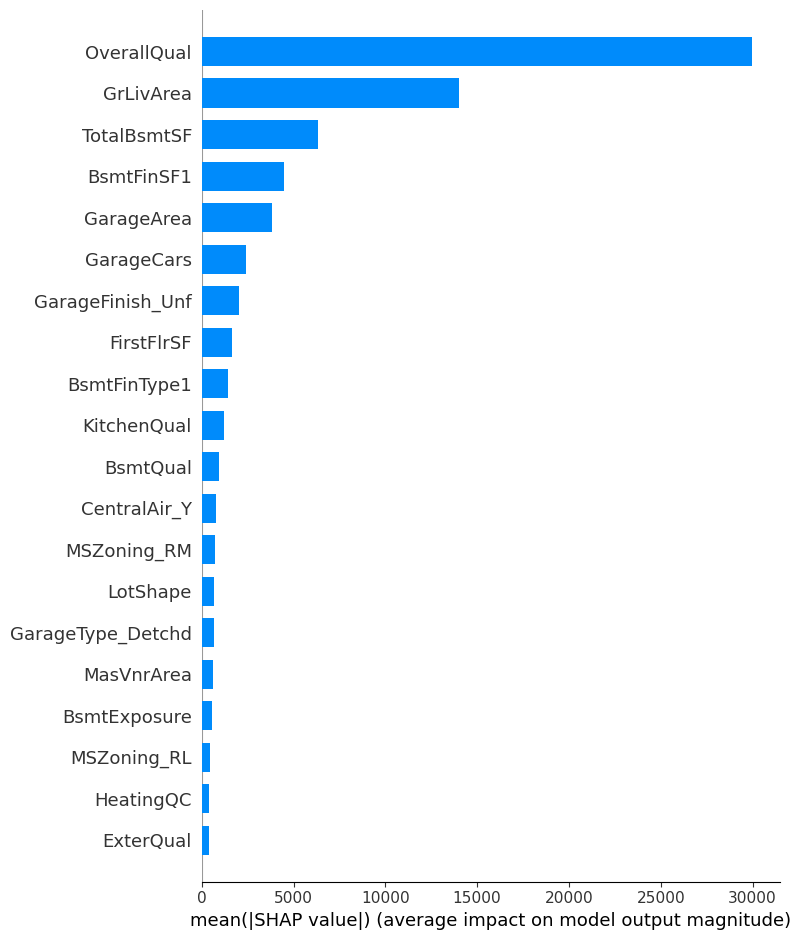

In [213]:
shap.summary_plot(shap_values,X1,plot_type = 'bar', feature_names= d)

- As of now checked the features in manually, RFE and shap it predicted more number of continuous features than categorical variables.
- Going to take the continuous variables to predict the model.

In [214]:
train_data = pd.read_csv('./train.csv',index_col=0)
test_data  = pd.read_csv('./test.csv',index_col=0)
target     = 'SalePrice'

In [215]:
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop([target], axis=1)
y_train = train_data[target]
X_test  = test_data.select_dtypes(include=['number']).copy()

In [216]:
X_train = X_train.fillna(X_train.mean())
X_test  = X_test.fillna(X_test.mean())

- After many tries with features selection finally got the below ranges it gives the best predictions.

In [217]:
reg = RandomForestRegressor(n_estimators=100, max_depth=10)

In [218]:
n_features_to_select = 32
rfe = RFE(reg, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=32)

In [219]:
output = rfe.predict(X_test)

In [220]:
output

array([126684.18878057, 157059.66614372, 180533.08881825, ...,
       159241.18030816, 112788.44953479, 231513.93896556])

In [221]:
data = pd.DataFrame({"Id":test_data.index, target:output})
data.to_csv('submissionN.csv', index=False)

In [222]:
grad = GradientBoostingRegressor(n_estimators=100,max_depth=10)

In [223]:
n_features_to_select = 32
rfe = RFE(grad, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=GradientBoostingRegressor(max_depth=10), n_features_to_select=32)

In [224]:
output1 = rfe.predict(X_test)

In [225]:
output1

array([131786.22622381, 152864.28494767, 197877.11652295, ...,
       169212.92971743, 104280.39011102, 226178.61545993])

In [231]:
datag = pd.DataFrame({"Id":test_data.index, target:output1})
datag.to_csv('submissionG.csv', index=False)

In [227]:
ada = AdaBoostRegressor(n_estimators=100)

In [228]:
n_features_to_select = 32
rfe = RFE(ada, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=AdaBoostRegressor(n_estimators=100), n_features_to_select=32)

In [229]:
output2 = rfe.predict(X_test)

In [230]:
output2

array([123332.54325956, 145209.0239726 , 187400.81308411, ...,
       164308.88333333, 138307.94876325, 251091.2716763 ])

In [232]:
dataA = pd.DataFrame({"Id":test_data.index, target:output2})
dataA.to_csv('submissionA.csv', index=False)

- Based on R2-Score chose three models, from that models Random Forest Regresser gave the best predictions.